# ML Basic Concepts

** **bold text**Machine Learning :**

It is field of computer science that uses a statistical methods to learn from past data without being explicitly programmed.
simply it is all about learning from data.


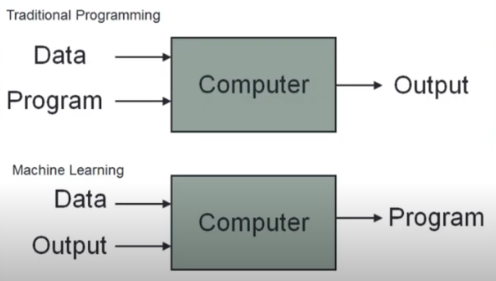

**When to use ML :**

many things are very difficult in programming, it is very hard to write many condition or cases.
1. spam email classifier : how many conditions wil you write?
2. image classifier : how many condition or cases will you write to categorize any image?


**AI :**

to mimic computer like human intelligence
Symbolic AI : it is AI based on expert system(knowledge is gained by experts and convert that knowledge into programs) based on multiple condition and cases eg. online chess game


limitations of symbolic AI : it is specific to perticular problem

**ML :**

inspired by statistic -- feed a data (input and output) to learn a pattern from the data without explicitly programmed.


**DL :**

It is inspired by percentron(biological neuron), best thing is auto feature selection we dont need to specify any feature.


**ML Types :**

1. Superwised : regression, classification
2. un-superwised :
            1. Clustering : auto categorization
            2. Dimensionality reduction: reduce column size
            3. Anomaly detection : outlier thnigs
            4. Association Rule Learning : milk ->egg -> bread


**ML Training Types / Model Retraining Approatch / Machine-Learning-Retraining-Approaches :**


1. Batch ML : here every time you will train model with entire new dataset. when new data added to database so again we have to train model with entire dataset.
2. Online Learning (incremental approach) : unlike batch learning it done increamently so when ever new data comes, existing model just update with new learning data no need to train with entire data set again. that's why it is soo faster.
eg. games(subway surfers, templerun), youtube video recomendation etc.

Opensource Libraries : https://github.com/online-ml/river

https://vowpalwabbit.org/

3. Out of Core Learning : it is similar to online learning approach but will done offline eg. you have 100TB data but your computer have only 8GB RM so you can not train 1000TB data.
so what you can do here, you can convert 100TB into small small chunks and you will train model using small chunks one by one increamentally.




In [ ]:
## Online Learning Examples
# using sklearn ---> 1. SGDRegressor
import numpy as np
from sklearn import linear_model
n_samples, n_features = 1,500

X= np.random.randn(n_samples,n_features)
y= np.random.randn(n_samples)

clf = linear_model.SGDRegressor()

clf.partial_fit(X,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
# again training on new data only
X= np.random.randn(n_samples,n_features)
y= np.random.randn(n_samples)

clf.partial_fit(X,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

**Creme**
With creme, we encourage a different approach, which is to continuously learn a stream of data. This means that the model process one observation at a time, and can therefore be updated on the fly. This allows to learn from massive datasets that don't fit in main memory. Online machine learning also integrates nicely in cases where new data is constantly arriving. It shines in many use cases, such as time series forecasting, spam filtering, recommender systems, CTR prediction, and IoT applications. If you're bored with retraining models and want to instead build dynamic models, then online machine learning (and therefore creme!) might be what you're looking for.

Here are some benefits of using creme (and online machine learning in general):

1. Incremental: models can update themselves in real-time.
2. Adaptive: models can adapt to concept drift.
3. Production-ready: working with data streams makes it simple to replicate production scenarios during model development.
4. Efficient: models don't have to be retrained and require little compute power, which lowers their carbon footprint
5. Fast: when the goal is to learn and predict with a single instance at a time, then creme is a order of magnitude faster than PyTorch, Tensorflow, and scikit-learn.

In [ ]:
# using creme library
!pip install creme

     |████████████████████████████████| 1.1MB 22.9MB/s 
  Created wheel for mmh3: filename=mmh3-2.5.1-cp37-cp37m-linux_x86_64.whl size=39654 sha256=6f817c30c2aac1491a3cf3e0a04375af852a91dab20f5d8643e0d8a5c6c35a42
  Stored in directory: /root/.cache/pip/wheels/38/b4/ea/6e4e321c625d3320c0c496bf4088371546d8fce5f1dd71b219
Successfully built mmh3


In [ ]:
import math
from creme import compose
from creme import feature_extraction
from creme import naive_bayes
import creme

In [ ]:
docs = [   ('Chinese Beijing Chinese', 'yes'),
 ('Chinese Chinese Shanghai', 'yes'),
('Chinese Macao', 'yes'),
('Tokyo Japan Chinese', 'no')
]
docs

[('Chinese Beijing Chinese', 'yes'),
 ('Chinese Chinese Shanghai', 'yes'),
 ('Chinese Macao', 'yes'),
 ('Tokyo Japan Chinese', 'no')]

In [ ]:
model = compose.Pipeline(
    ('tokenize', feature_extraction.BagOfWords(lowercase=False)),
    ('nb', naive_bayes.MultinomialNB(alpha=1)))

In [ ]:
#train model
%%time
for sentence, label in docs:
     model = model.fit_one(sentence, label)

CPU times: user 520 µs, sys: 0 ns, total: 520 µs
Wall time: 529 µs


In [ ]:
new_unseen_text = 'Tokyo india'
model.predict_one(new_unseen_text)

'no'

In [ ]:
#Training on a new data and new category
model.fit_one('India USA','may be')
model.predict_one("India Germany")

'may be'

**Incremental Learning- Model Retraining Approach**


In [ ]:
import math
from creme import compose
from creme import feature_extraction
from creme import naive_bayes
import creme

import pandas as pd
messages = pd.read_csv('/content/drive/MyDrive/Datasets/SMSSpamCollection.txt', sep='\t',
                           names=["label", "message"])
messages

label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [ ]:
messages.shape

(5572, 2)

In [ ]:
from sklearn.model_selection import train_test_split
message_train,message_test=train_test_split(messages)

In [ ]:
message_train

label                                            message
3514   ham     Staff of placement training in Amrita college.
2324   ham  Sorry dude. Dont know how i forgot. Even after...
2353   ham                      Thats cool. How was your day?
270   spam  Ringtone Club: Get the UK singles chart on you...
4147   ham  I cant wait for cornwall. Hope tonight isnt ...
...    ...                                                ...
4400   ham  Yes just finished watching days of our lives. ...
3087   ham  I wish that I was with you. Holding you tightl...
200    ham           Found it, ENC  &lt;#&gt; , where you at?
3957   ham  Haha... dont be angry with yourself... Take it...
3179   ham                  K k :-):-) then watch some films.

[4179 rows x 2 columns]

In [ ]:
# Convert dataframe to list of tuples
messages_train = message_train.to_records(index=False)
messages_test=message_test.to_records(index=False)

In [ ]:
messages_train

rec.array([('ham', 'Staff of placement training in Amrita college.'),
           ('ham', 'Sorry dude. Dont know how i forgot. Even after Dan reminded me. Sorry. Hope you guys had fun.'),
           ('ham', 'Thats cool. How was your day?'), ...,
           ('ham', 'Found it, ENC  &lt;#&gt; , where you at?'),
           ('ham', 'Haha... dont be angry with yourself... Take it as a practice for the real thing. =) '),
           ('ham', 'K k :-):-) then watch some films.')],
          dtype=[('label', 'O'), ('message', 'O')])

In [ ]:
# Creating the pipeline
# 1st function is creating the TFIDF
# 2nd function is the naive bayes predictor
import math
from creme import compose
from creme import feature_extraction
from creme import naive_bayes
import creme
model = compose.Pipeline(
    ('tokenize', feature_extraction.TFIDF(lowercase=False)),
    ('nb', naive_bayes.MultinomialNB(alpha=1))
)

In [ ]:
from creme import metrics
metric=metrics.Accuracy()
# Training the model row by row
for label,sentence in messages_train:
    model = model.fit_one(sentence, label)
    y_pred = model.predict_one(sentence)
    metric = metric.update(label, y_pred)

In [ ]:
### Training Data Accuracy
metric

Accuracy: 95.91%

In [ ]:
### test Data Accuracy
test_metric=metrics.Accuracy()
for label,sentence in messages_test:
    y_pred = model.predict_one(sentence)
    test_metric = metric.update(label, y_pred)

In [ ]:
### test Metric
test_metric

Accuracy: 95.98%

In [ ]:
model.fit_one("This guy is neutral", "ham")
model.fit_one("Everybody is neutral ", "ham")

Pipeline (
  TFIDF (
    normalize=True
    on=None
    strip_accents=True
    lowercase=False
    preprocessor=None
    tokenizer=<built-in method findall of re.Pattern object at 0x7f8014131ed0>
    ngram_range=(1, 1)
  ),
  MultinomialNB (
    alpha=1
  )
)

In [ ]:
model.predict_one("This guy is neutral")

'ham'

**ML Concepts** :
1. feature engineering : remove unwanted columns, combine columns(pca) etc.
2. underfitting :
3. overfitting :

**Tensor:**

Basically it is container to store numbers.
1. Zero Dimention Tensor : single number is called scaller eg. 10 is called Zero Dimentional Tensor becase the is no dimention.
2. One Dimentional Tensor : a number list is called ODT eg. [1,4,6]
3.


**Diffrence between Vector and Tensor :**

all the tensors are vector,

all the vector is also tensor

but the we can diffrenciate based on dimention

eg. lst[1,3,4] here list is called tensor and vector too but the tensor dimention is One and vector dimention is 3. that is the difference.


In [ ]:
import numpy as np
# Zero Dimention Tensor
a = np.array(10)
print(a)
print(a.ndim)
# One Dimention Tensor
a = np.array([10,20,30])
print(a)
print(a.ndim)
# Two Dimention Tensor
a = np.array([[10,20,30],[3,2,1]])
print(a)
print(a.ndim)

10
0
[10 20 30]
1
[[10 20 30]
 [ 3  2  1]]
2


# End to End Machine Learning with simple example

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/placement.csv')
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
#we dont need first column so remove it
df = df.iloc[:,1:]
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

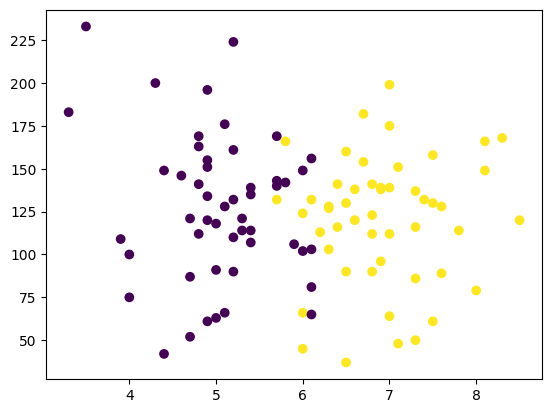

In [ ]:
# EDA
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train, y_train

(    cgpa     iq
 33   6.0  149.0
 95   4.3  200.0
 69   8.5  120.0
 70   6.3  127.0
 9    5.1   66.0
 ..   ...    ...
 12   5.4  139.0
 42   7.6   89.0
 19   5.2  132.0
 63   6.3  128.0
 71   6.1  132.0
 
 [90 rows x 2 columns],
 33    0
 95    0
 69    1
 70    1
 9     0
      ..
 12    0
 42    1
 19    0
 63    1
 71    1
 Name: placement, Length: 90, dtype: int64)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.01213437,  0.62493615],
       [-1.5349975 ,  1.91239437],
       [ 2.28732829, -0.10714794],
       [ 0.28515764,  0.06956201],
       [-0.80693545, -1.470339  ],
       [-1.17096647, -0.94020914],
       [ 1.37725072,  0.85213466],
       [-0.16988115,  0.4482262 ],
       [ 0.10314212, -0.53630068],
       [ 1.19523521, -0.96545342],
       [ 0.46717315,  0.14529485],
       [ 1.65027399, -0.25861361],
       [ 0.92221194,  0.37249336],
       [-0.8979432 , -0.1576365 ],
       [ 0.10314212, -1.09167481],
       [-0.2608889 ,  0.47347047],
       [ 0.01213437, -1.470339  ],
       [ 0.64918867,  1.45799735],
       [ 1.37725072, -1.59656039],
       [ 0.92221194,  1.88715009],
       [-0.8979432 , -1.54607183],
       [-1.07995872,  0.42298192],
       [-0.71592769, -0.8644763 ],
       [ 0.10314212, -1.49558328],
       [ 0.92221194, -1.52082755],
       [ 1.46825848,  0.09480629],
       [-0.16988115,  1.05408889],
       [-1.44398974,  0.62493615],
       [-1.07995872,

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.74019642, -0.0314151 ],
       [ 0.01213437, -0.00617082],
       [-0.2608889 ,  0.19578341],
       [ 2.10531278,  1.10457745],
       [ 1.37725072,  0.14529485],
       [-0.53391217, -0.25861361],
       [-1.80802077, -1.24314049],
       [-2.44507507,  1.48324163],
       [ 0.74019642, -0.8644763 ],
       [ 0.46717315, -2.20242308]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)
y_pred, y_test

(array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1]),
 0     1
 27    1
 87    1
 53    1
 83    1
 41    0
 68    0
 17    0
 35    1
 82    1
 Name: placement, dtype: int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

TypeError: ignored

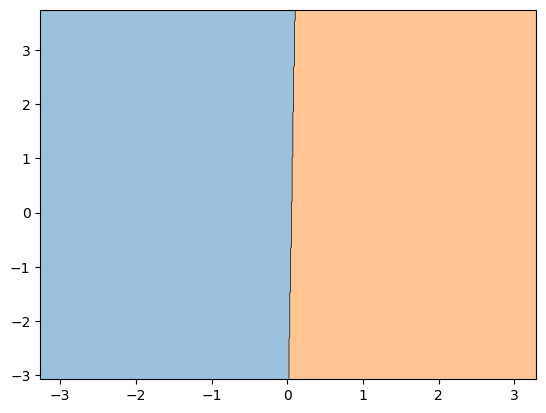

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

# working with csv, json, mysql, api

In [ ]:
# working with csv
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/Shipableorders.csv")
df.head()

Salesid        lat         lon  IsShipable
0  SO-00579056  30.354690  -95.045140           1
1  SO-00579558  48.370833 -114.241667           1
2  SO-00580009  40.366180 -105.170723           1
3  SO-00580494  39.044969 -104.837550           1
4  SO-00580513  38.390031 -104.774331           1

In [ ]:
# working with json
import pandas as pd
df = pd.read_json("/content/drive/MyDrive/Datasets/sample3.json")
df.head()

color value
0      red  #f00
1    green  #0f0
2     blue  #00f
3     cyan  #0ff
4  magenta  #f0f

In [ ]:
# working with mysql
!pip install mysql.connector

import mysql.connector
import pandas as pd

conn = mysql.connector.connect(host='localhost',user='root',password='',database='world')
df = pd.read_sql_query("SELECT * FROM tbltest",conn)
df.head()

In [ ]:
# working with API
import pandas as pd
import requests
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page=1')
df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]
df.head()

id                        title  ... vote_average vote_count
0   19404  Dilwale Dulhania Le Jayenge  ...          8.7       3032
1     278     The Shawshank Redemption  ...          8.7      19255
2     238                The Godfather  ...          8.7      14520
3  724089    Gabriel's Inferno Part II  ...          8.7       1284
4  761053   Gabriel's Inferno Part III  ...          8.7        841

[5 rows x 7 columns]

# Understand Data Scriptive State

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/sample.csv')
df.head()

PassengerId Survived  Pclass  ...     Fare Cabin  Embarked
0           1        0     3.0  ...   7.2500   NaN         S
1           2        1     1.0  ...  71.2833   C85         C
2           3        1     3.0  ...   7.9250   NaN         S
3           4        1     1.0  ...  53.1000  C123         S
4           5        0     3.0  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
# How big is the data?
df.shape

(892, 12)

In [ ]:
How does the data look like?
df.sample(5)

Object `like` not found.


PassengerId Survived  Pclass  ...     Fare    Cabin  Embarked
455         456        1     3.0  ...   7.8958      NaN         C
97           98        1     1.0  ...  63.3583  D10 D12         C
62           63        0     1.0  ...  83.4750      C83         S
82           83        1     3.0  ...   7.7875      NaN         Q
841         842        0     2.0  ...  10.5000      NaN         S

[5 rows x 12 columns]

In [ ]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    object 
 1   Survived     892 non-null    object 
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(5), object(7)
memory usage: 83.8+ KB


In [ ]:
# Are there any missing values?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           1
Name             1
Sex              1
Age            178
SibSp            1
Parch            1
Ticket           1
Fare             1
Cabin          688
Embarked         3
dtype: int64

In [ ]:
# How does the data look mathematically?
df.describe()

Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
# Are there duplicate values?
df.duplicated().sum()

0

In [ ]:
# How is the correlation between cols?
df.corr()

Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000

# EDA - Exploratory Data Analysis

1. **Univariate Analysis:** Single Variable Analysis
2. **Bivariate Analysis:** Two Column Analysis
3. **Multivariate Analysis:** Morethen Two Column Analysis
4. **Pandas Profiling :** automatically analyse entire dataframe and will tell you many things about data.

**1. Univariate Analysis: Single Variable Analysis**

***1. Categorical Data Analysis***

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Datasets/sample.csv')
df.head()

PassengerId Survived  Pclass  ...     Fare Cabin  Embarked
0           1        0     3.0  ...   7.2500   NaN         S
1           2        1     1.0  ...  71.2833   C85         C
2           3        1     3.0  ...   7.9250   NaN         S
3           4        1     1.0  ...  53.1000  C123         S
4           5        0     3.0  ...   8.0500   NaN         S

[5 rows x 12 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


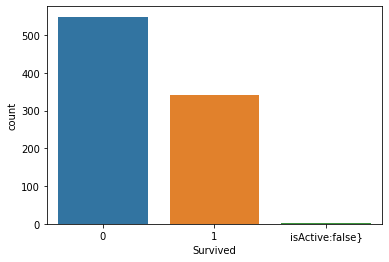

In [ ]:
sns.countplot(df['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


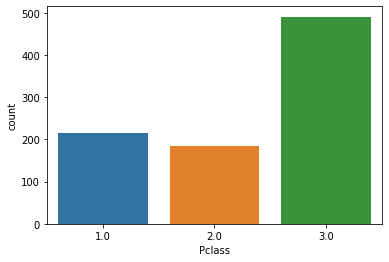

In [ ]:
sns.countplot(df['Pclass'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


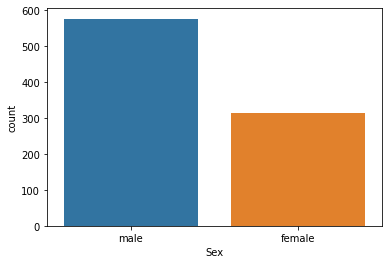

In [ ]:
sns.countplot(df['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


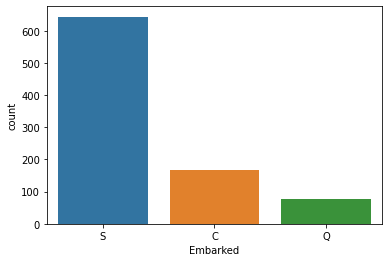

In [ ]:
sns.countplot(df['Embarked']) #how many people from which station

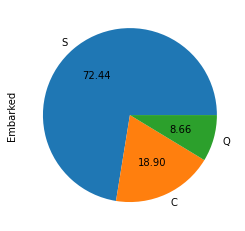

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

***2. Numerical Data Analysis***

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <a list of 5 Patch objects>)

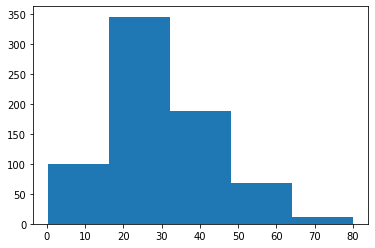

In [ ]:
# Histogram : to understand the distrubution of data
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


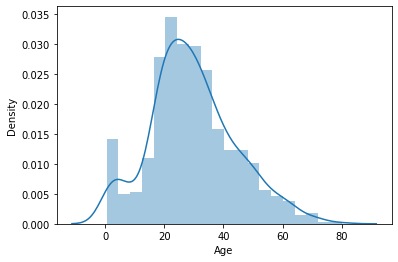

In [ ]:
# Distplot : it is a kind of improved histogram , which shows you a probability density function
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


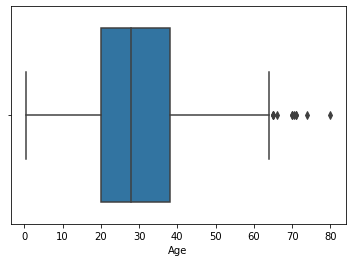

In [ ]:
# Boxplot : shows fice number summery (used to find outlier of data)
sns.boxplot(df['Age'])

**2. bivariate/multi Variable Analysis**

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Datasets/sample.csv')
titanic.head()

PassengerId Survived  Pclass  ...     Fare Cabin  Embarked
0           1        0     3.0  ...   7.2500   NaN         S
1           2        1     1.0  ...  71.2833   C85         C
2           3        1     3.0  ...   7.9250   NaN         S
3           4        1     1.0  ...  53.1000  C123         S
4           5        0     3.0  ...   8.0500   NaN         S

[5 rows x 12 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


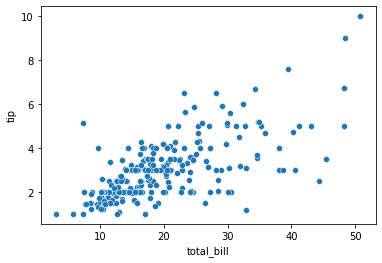

In [ ]:
# 1. Scatterplot (Numerical - Numerical) : to know relation ship between two numerical variable
sns.scatterplot(tips['total_bill'],tips['tip'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


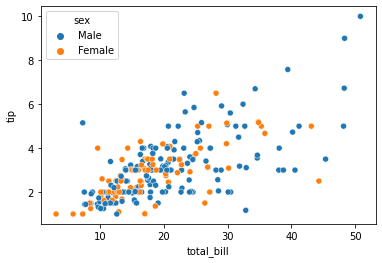

In [ ]:
# 2. Scatterplot (for 3 variable) : to know relation ship between two numerical variable
sns.scatterplot(tips['total_bill'],tips['tip'],hue=tips['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


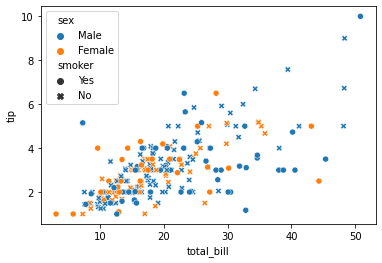

In [ ]:
# 3. Scatterplot (for 4 variable)
sns.scatterplot(tips['total_bill'],tips['tip'],hue=tips['sex'],style=tips['smoker'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


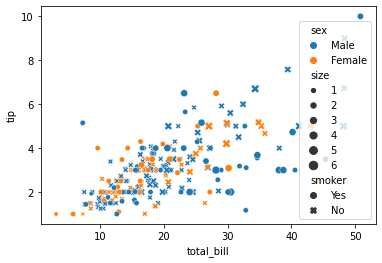

In [ ]:
# 4. Scatterplot (for 5 variable)
sns.scatterplot(tips['total_bill'],tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


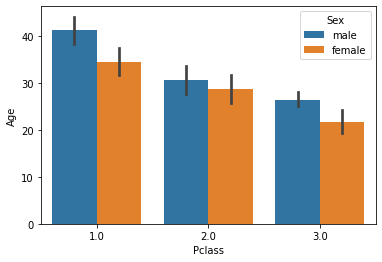

In [ ]:
#2. Bar Plot (Numerical - Categorical)
sns.barplot(titanic['Pclass'],titanic['Age'],hue=titanic['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


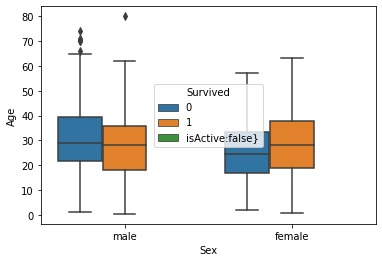

In [ ]:
#3. Box Plot (Numerical - Categorical)
sns.boxplot(titanic['Sex'],titanic['Age'],hue=titanic['Survived'])

Survived    0    1
Pclass            
1.0        80  136
2.0        97   87
3.0       372  119


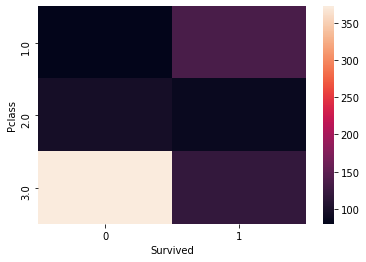

In [ ]:
# 4. HeatMap (Categorical - Categorical)
print(pd.crosstab(titanic['Pclass'],titanic['Survived']))
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

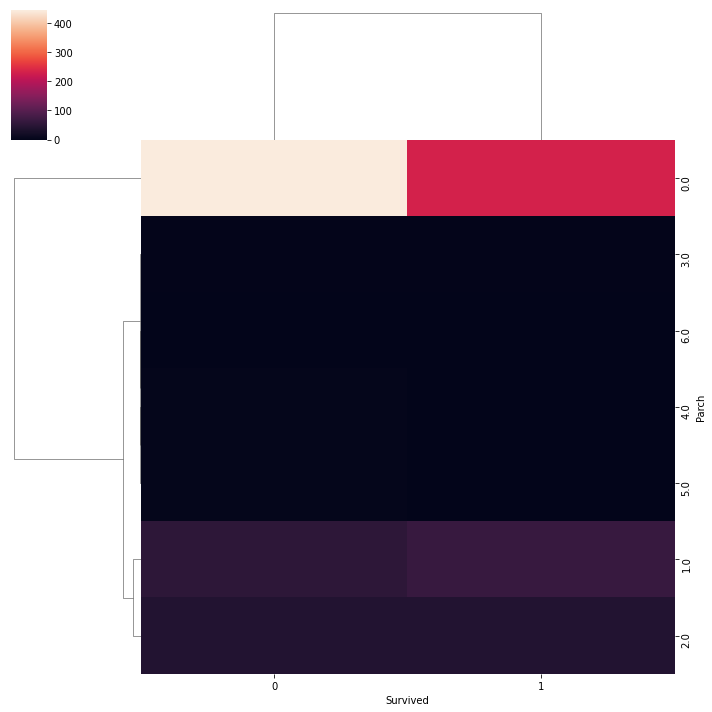

In [ ]:
# 5. ClusterMap (Categorical - Categorical)
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

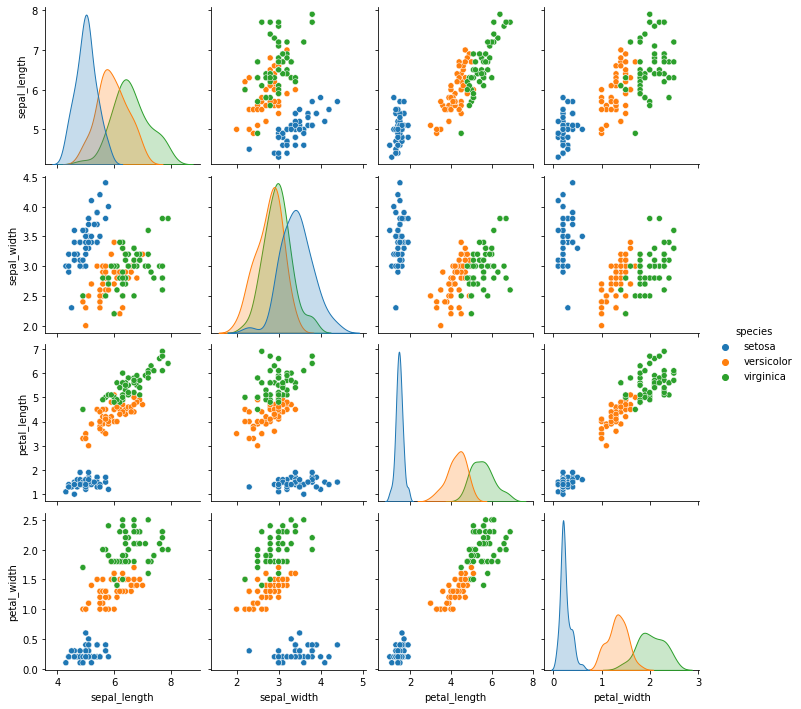

In [ ]:
# 6. Pairplot
iris.head()
sns.pairplot(iris,hue='species')

In [ ]:
# 7. Lineplot (Numerical - Numerical)
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


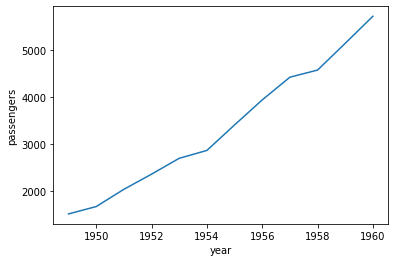

In [ ]:
new = flights.groupby('year').sum().reset_index()
sns.lineplot(new['year'],new['passengers'])

**4.Pandas Profiling**

```
 It is auto Analysis tool for analysis(missing value, corelation between every columns, univeriate,bivariate analysis etc.)
```



In [ ]:
# !pip install pandas-profiling

In [ ]:
import pandas as pd
print(pd.__version__)
titanic = pd.read_csv('/content/drive/MyDrive/Datasets/sample.csv')
titanic.head()

1.3.1


PassengerId Survived  Pclass  ...     Fare Cabin  Embarked
0           1        0     3.0  ...   7.2500   NaN         S
1           2        1     1.0  ...  71.2833   C85         C
2           3        1     3.0  ...   7.9250   NaN         S
3           4        1     1.0  ...  53.1000  C123         S
4           5        0     3.0  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(titanic)
prof.to_file(output_file='output.html')

# Feature Engineering
Simply, by using Feature Engineering we improve the performance of the model.
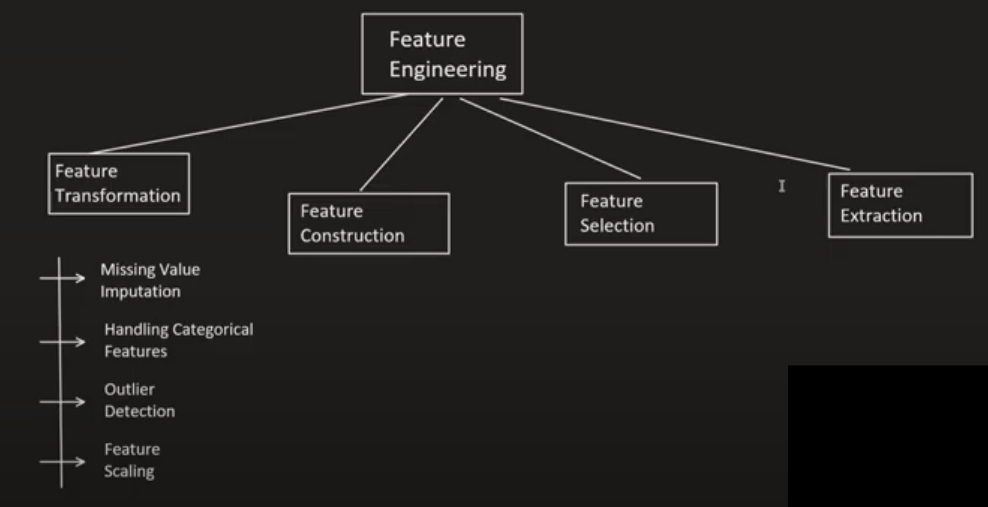

1. Feature Selection
2. Handling missing values
3. Handling imbalanced data
4. Handling outliers
5. Binning
6. Encoding
7. text vectorization
8. Feature Scaling

# K-Fold Cross Validation
1. Train model with 70% and test with 30% : here it might possible that in 30% test some of the things might not included in training so it can not predict it correctly.
2. K-Fold Cross Validation : Best one
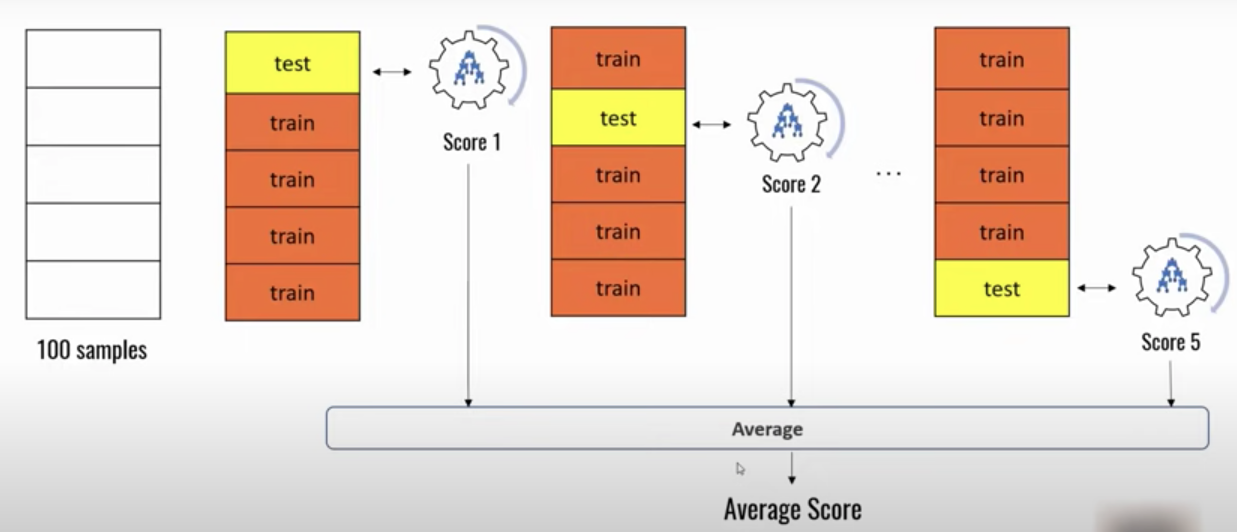

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [ ]:
#Logistic Regression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9685185185185186

In [ ]:
# SVM
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.3111111111111111

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.975925925925926

**KFold cross validation**

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Logistic regression model performance using cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [ ]:
# svm model performance using cross_val_score
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [ ]:
# random forest performance using cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.91986644, 0.95492487, 0.92153589])

# Regression

## Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/homeprices.csv')
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

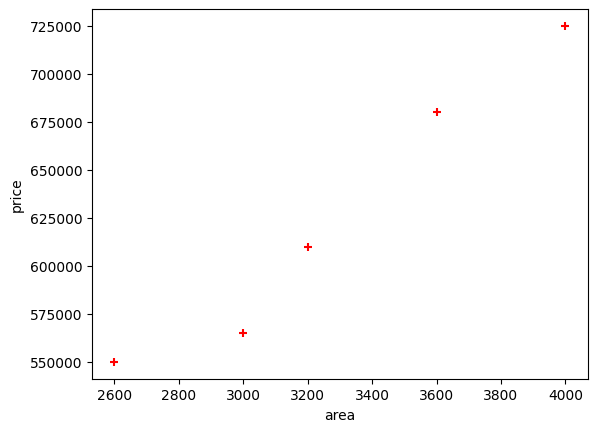

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
# Separate the independent variable (area) and the dependent variable (price)
X = df["area"].values.reshape(-1, 1)
y = df["price"].values

In [ ]:
# Create linear regression object
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
# Get the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_
print("slope:",slope)
print("intercept:",intercept)

slope: 135.78767123287673
intercept: 180616.43835616432


In [ ]:
# Predict price for new areas (e.g., [250, 300, 350])
new_areas = [[250], [300], [350]]
predicted_prices = model.predict(new_areas)
print(predicted_prices)

[214563.35616438 221352.73972603 228142.12328767]


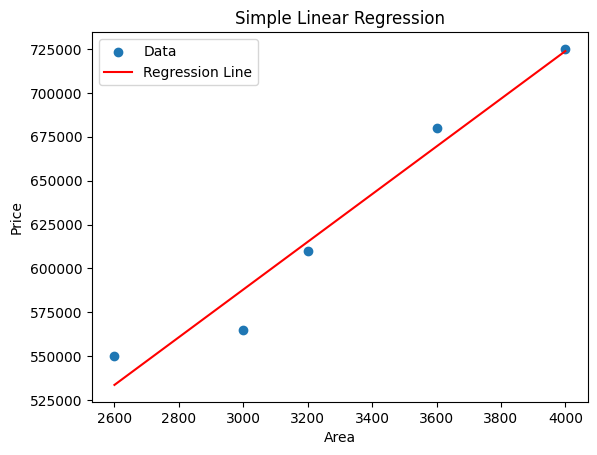

In [ ]:
# Plot the data and the regression line
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [ ]:
# Print the equation of the regression line
print(f"Regression Line: Price = {slope:.2f} * Area + {intercept:.2f}")


Regression Line: Price = 135.79 * Area + 180616.44


In [ ]:
# Print predicted prices for new areas
for area, price in zip(new_areas, predicted_prices):
    print(f"Predicted Price for Area {area[0]}: {price:.2f}")

Predicted Price for Area 250: 214563.36
Predicted Price for Area 300: 221352.74
Predicted Price for Area 350: 228142.12


## Simple Leanear Regression - Multivariate

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/homeprices_multivariate.csv')
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
reg.predict([[2500, 4, 5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

# Regularization
to overcome from overfitting problem
1. Lasso - L1 Regularization
2. Ridge - L2 Regularization

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# read dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Melbourne_housing_FULL.csv')
dataset.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [ ]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [ ]:
dataset.head()

Suburb  Rooms Type Method SellerG             Regionname  \
0  Abbotsford      2    h     SS  Jellis  Northern Metropolitan   
1  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
2  Abbotsford      2    h      S  Biggin  Northern Metropolitan   
3  Abbotsford      3    u     VB  Rounds  Northern Metropolitan   
4  Abbotsford      3    h     SP  Biggin  Northern Metropolitan   

   Propertycount  Distance         CouncilArea  Bedroom2  Bathroom  Car  \
0         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
1         4019.0       2.5  Yarra City Council       2.0       1.0  1.0   
2         4019.0       2.5  Yarra City Council       2.0       1.0  0.0   
3         4019.0       2.5  Yarra City Council       3.0       2.0  1.0   
4         4019.0       2.5  Yarra City Council       3.0       2.0  0.0   

   Landsize  BuildingArea      Price  
0     126.0           NaN        NaN  
1     202.0           NaN  1480000.0  
2     156.0          79.0  1035000.0  
3       0.0           NaN        NaN  
4     134.0         150.0  1465000.0

In [ ]:
# Checking for Nan values
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
#Handling Missing values
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [ ]:
# Drop NA values of Price, since it's our predictive variable we won't impute it
dataset.dropna(inplace=True)

In [ ]:
# Let's one hot encode the categorical features
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car  Landsize  \
1      2         4019.0       2.5       2.0       1.0  1.0     202.0   
2      2         4019.0       2.5       2.0       1.0  0.0     156.0   
4      3         4019.0       2.5       3.0       2.0  0.0     134.0   
5      3         4019.0       2.5       3.0       2.0  1.0      94.0   
6      4         4019.0       2.5       3.0       1.0  2.0     120.0   

   BuildingArea      Price  Suburb_Aberfeldie  ...  \
1      160.2564  1480000.0                  0  ...   
2       79.0000  1035000.0                  0  ...   
4      150.0000  1465000.0                  0  ...   
5      160.2564   850000.0                  0  ...   
6      142.0000  1600000.0                  0  ...   

   CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
1                                    0                                  0   
2                                    0                                  0   
4                                    0                                  0   
5                                    0                                  0   
6                                    0                                  0   

   CouncilArea_Nillumbik Shire Council  CouncilArea_Port Phillip City Council  \
1                                    0                                      0   
2                                    0                                      0   
4                                    0                                      0   
5                                    0                                      0   
6                                    0                                      0   

   CouncilArea_Stonnington City Council  CouncilArea_Whitehorse City Council  \
1                                     0                                    0   
2                                     0                                    0   
4                                     0                                    0   
5                                     0                                    0   
6                                     0                                    0   

   CouncilArea_Whittlesea City Council  CouncilArea_Wyndham City Council  \
1                                    0                                 0   
2                                    0                                 0   
4                                    0                                 0   
5                                    0                                 0   
6                                    0                                 0   

   CouncilArea_Yarra City Council  CouncilArea_Yarra Ranges Shire Council  
1                               1                                       0  
2                               1                                       0  
4                               1                                       0  
5                               1                                       0  
6                               1                                       0  

[5 rows x 745 columns]

In [ ]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

**Let's train our Linear Regression Model on training dataset and check the accuracy on test set**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)
print("Accuracy on Testing Data : ",reg.score(test_X, test_y))
print("Accuracy on Training Data : ",reg.score(train_X, train_y))

Accuracy on Testing Data :  0.13853683161639851
Accuracy on Training Data :  0.6827792395792723


Here training score is 68% but test score is 13.85% which is very low

Normal Regression is clearly overfitting the data, let's try other models

**Using Lasso (L1 Regularized) Regression Model**

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
print("Lasso Accuracy Score on Testing Data : ",lasso_reg.score(test_X, test_y))
print("Lasso Accuracy Score on Training Data : ",lasso_reg.score(train_X, train_y))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso Accuracy Score on Testing Data :  0.6636111369404489
Lasso Accuracy Score on Training Data :  0.6766985624766824


**Using Ridge (L2 Regularized) Regression Model**

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
print("Ridge Accuracy Score on Testing Data : ",ridge_reg.score(test_X, test_y))
print("Ridge Accuracy Score on Testing Data : ",ridge_reg.score(train_X, train_y))

Ridge Accuracy Score on Testing Data :  0.6670848945194958
Ridge Accuracy Score on Testing Data :  0.6622376739684328


We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too

# Classification


1.   Logistic Regression
2.   Logistic Regression with MultiClass



## 1. Logistic Regresion

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/insurance_data.csv")
df.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

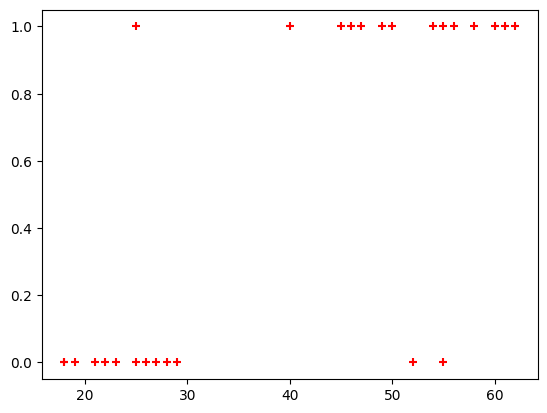

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df['bought_insurance'],train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 1, 1, 0, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.83374971, 0.16625029],
       [0.86323222, 0.13676778],
       [0.13741025, 0.86258975],
       [0.33466384, 0.66533616],
       [0.87624908, 0.12375092],
       [0.07399723, 0.92600277]])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
model.coef_

array([[0.11498023]])

In [ ]:
model.intercept_

array([-4.48694465])

## Logistic Regression with MultiClass

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 640x480 with 0 Axes>

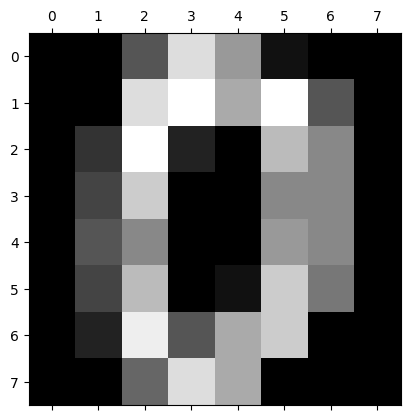

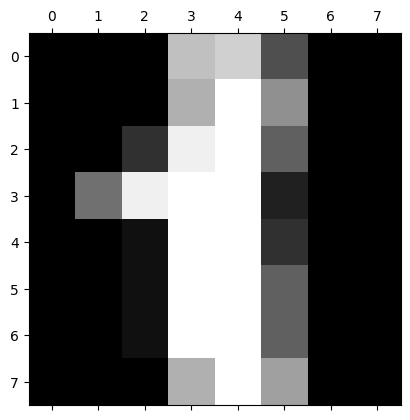

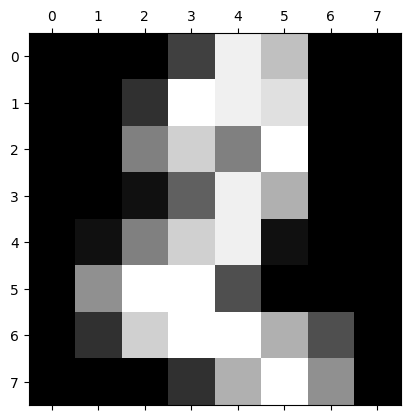

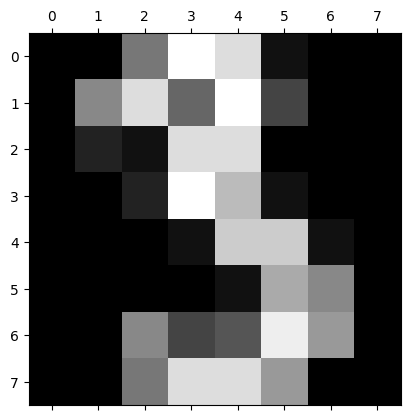

In [ ]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits['data'],digits['target'], test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.9694444444444444

In [ ]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([3, 7, 3, 1, 2, 7, 2, 4, 3, 9, 6, 2, 8, 3, 5, 1, 3, 9, 5, 4, 1, 3,
       3, 6, 3, 3, 8, 1, 3, 8, 1, 1, 0, 9, 9, 3, 8, 8, 0, 1, 4, 4, 2, 0,
       4, 7, 6, 3, 0, 8, 1, 4, 3, 5, 1, 3, 7, 6, 5, 5, 4, 8, 5, 2, 5, 7,
       0, 7, 7, 5, 2, 0, 3, 3, 2, 6, 0, 1, 4, 1, 9, 6, 2, 6, 8, 2, 7, 9,
       8, 4, 3, 2, 3, 4, 5, 6, 7, 6, 8, 3, 8, 9, 9, 8, 2, 8, 6, 1, 7, 2,
       1, 8, 1, 3, 9, 8, 9, 4, 2, 7, 0, 2, 9, 6, 5, 3, 2, 7, 9, 8, 6, 1,
       0, 2, 3, 3, 0, 6, 5, 8, 8, 0, 8, 3, 2, 0, 0, 5, 0, 9, 9, 5, 0, 5,
       1, 2, 9, 9, 6, 9, 1, 6, 2, 4, 7, 4, 8, 2, 3, 1, 3, 9, 1, 6, 5, 9,
       1, 3, 2, 7, 2, 2, 2, 9, 5, 4, 9, 0, 2, 3, 8, 4, 7, 5, 7, 1, 5, 4,
       0, 3, 9, 8, 5, 6, 8, 9, 7, 6, 5, 9, 2, 1, 1, 3, 1, 3, 3, 7, 8, 3,
       6, 0, 7, 3, 9, 7, 8, 5, 6, 6, 6, 1, 5, 5, 3, 2, 2, 6, 6, 6, 1, 3,
       3, 1, 7, 5, 5, 4, 0, 7, 0, 5, 3, 0, 4, 5, 0, 0, 3, 7, 1, 4, 7, 5,
       6, 0, 3, 4, 3, 7, 1, 6, 7, 2, 8, 6, 4, 7, 3, 2, 5, 5, 6, 5, 1, 9,
       4, 9, 6, 2, 5, 9, 5, 7, 9, 9, 7, 6, 7, 8, 9,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 37]])

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

## Decision Tree
Draw a decision boundry where normal regresion or logistic regresion line is not possible
1. Information gain (low Entropy)
2. Gini Index

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/salaries.csv")
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [ ]:
X = df.drop('salary_more_then_100k',axis='columns')
y = df['salary_more_then_100k']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])

In [ ]:
X

company                  job     degree  company_n  job_n  degree_n
0       google      sales executive  bachelors          2      2         0
1       google      sales executive    masters          2      2         1
2       google     business manager  bachelors          2      0         0
3       google     business manager    masters          2      0         1
4       google  computer programmer  bachelors          2      1         0
5       google  computer programmer    masters          2      1         1
6   abc pharma      sales executive    masters          0      2         1
7   abc pharma  computer programmer  bachelors          0      1         0
8   abc pharma     business manager  bachelors          0      0         0
9   abc pharma     business manager    masters          0      0         1
10    facebook      sales executive  bachelors          1      2         0
11    facebook      sales executive    masters          1      2         1
12    facebook     business manager  bachelors          1      0         0
13    facebook     business manager    masters          1      0         1
14    facebook  computer programmer  bachelors          1      1         0
15    facebook  computer programmer    masters          1      1         1

In [ ]:
X = X.drop(['company','job','degree'],axis='columns')
X

company_n  job_n  degree_n
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         1
7           0      1         0
8           0      0         0
9           0      0         1
10          1      2         0
11          1      2         1
12          1      0         0
13          1      0         1
14          1      1         0
15          1      1         1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
X_train

company_n  job_n  degree_n
4           2      1         0
2           2      0         0
10          1      2         0
6           0      2         1
15          1      1         1
9           0      0         1
3           2      0         1
13          1      0         1
8           0      0         0
11          1      2         1
0           2      2         0

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,y_test)

0.8

In [ ]:
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
model.predict([[2,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
model.predict([[2,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Support Vector Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can try other kernels like 'rbf' or 'poly' as well
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# KNN (K Nearest Neighbors)
where k = number of nearest elements you wants to considure to find class of new element

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [ ]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [ ]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create KNN (K Neighrest Neighbour Classifier)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
knn.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

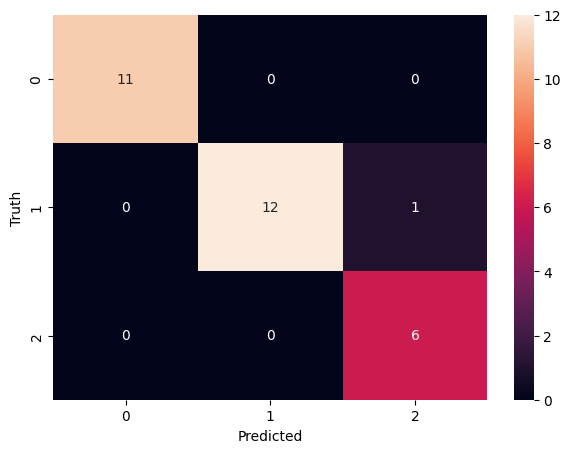

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Print classification report for precesion, recall and f1-score for each classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Naive Bayes

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/titanic.csv")
df.head()

PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

Pclass     Sex   Age     Fare  Survived
0       3    male  22.0   7.2500         0
1       1  female  38.0  71.2833         1
2       3  female  26.0   7.9250         1
3       1  female  35.0  53.1000         1
4       3    male  35.0   8.0500         0

In [ ]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [ ]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

female  male
0       0     1
1       1     0
2       1     0

In [ ]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

Pclass     Sex   Age     Fare  female  male
0       3    male  22.0   7.2500       0     1
1       1  female  38.0  71.2833       1     0
2       3  female  26.0   7.9250       1     0

In [ ]:
# I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

Pclass   Age     Fare  female
0       3  22.0   7.2500       0
1       1  38.0  71.2833       1
2       3  26.0   7.9250       1

In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

Pclass   Age     Fare  female
0       3  22.0   7.2500       0
1       1  38.0  71.2833       1
2       3  26.0   7.9250       1
3       1  35.0  53.1000       1
4       3  35.0   8.0500       0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.746268656716418

In [ ]:
model.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1])

In [ ]:
model.predict_proba(X_test)

array([[4.65553240e-01, 5.34446760e-01],
       [4.67111495e-01, 5.32888505e-01],
       [9.72632378e-01, 2.73676218e-02],
       [4.66172327e-01, 5.33827673e-01],
       [9.71001082e-01, 2.89989180e-02],
       [5.46573499e-03, 9.94534265e-01],
       [9.36310638e-01, 6.36893615e-02],
       [9.72471493e-01, 2.75285074e-02],
       [2.68846350e-01, 7.31153650e-01],
       [5.49260873e-03, 9.94507391e-01],
       [5.60578093e-01, 4.39421907e-01],
       [7.50941712e-01, 2.49058288e-01],
       [9.68877645e-01, 3.11223551e-02],
       [4.69534451e-01, 5.30465549e-01],
       [2.25768823e-01, 7.74231177e-01],
       [8.92313031e-01, 1.07686969e-01],
       [2.58977417e-01, 7.41022583e-01],
       [2.80245349e-01, 7.19754651e-01],
       [1.09914225e-01, 8.90085775e-01],
       [9.65617248e-01, 3.43827523e-02],
       [9.63926149e-01, 3.60738513e-02],
       [7.43399544e-01, 2.56600456e-01],
       [9.68735988e-01, 3.12640115e-02],
       [9.72581891e-01, 2.74181091e-02],
       [9.725939

# Clustering
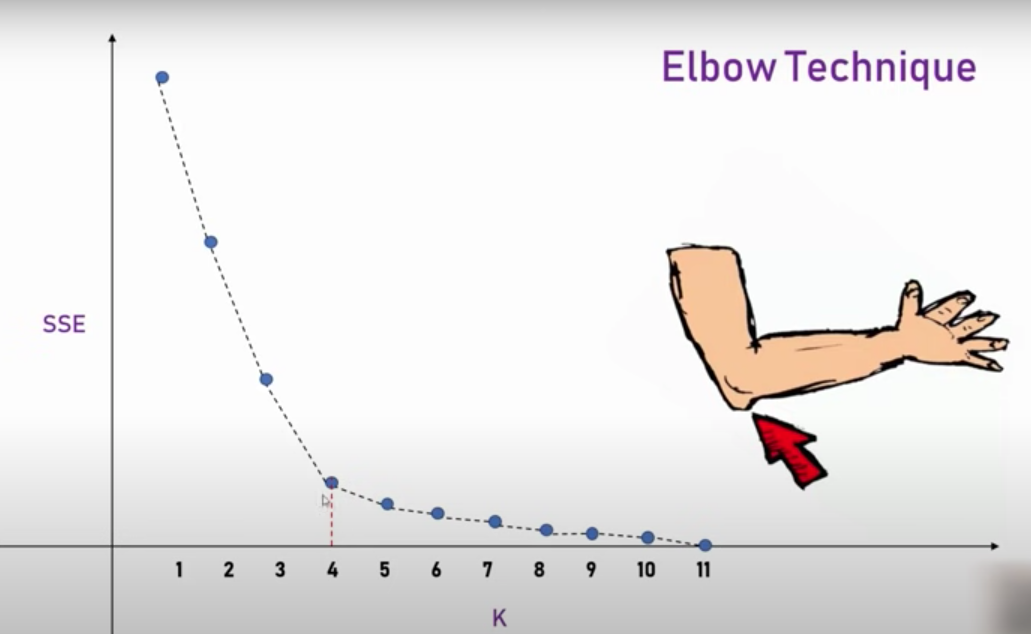

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/income.csv")
df.head()

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Text(0, 0.5, 'Income($)')

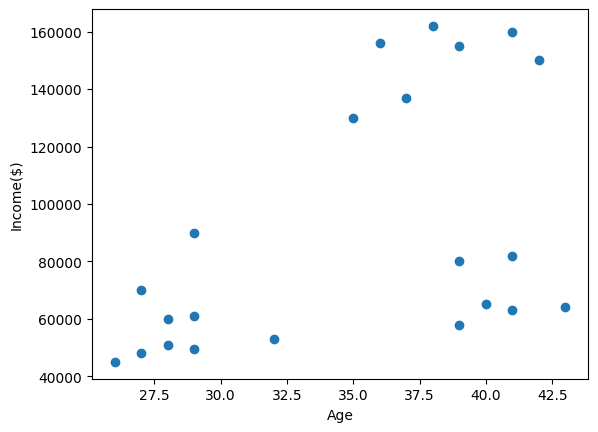

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

Name  Age  Income($)  cluster
0      Rob   27      70000        0
1  Michael   29      90000        0
2    Mohan   29      61000        2
3   Ismail   28      60000        2
4     Kory   42     150000        1

In [ ]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

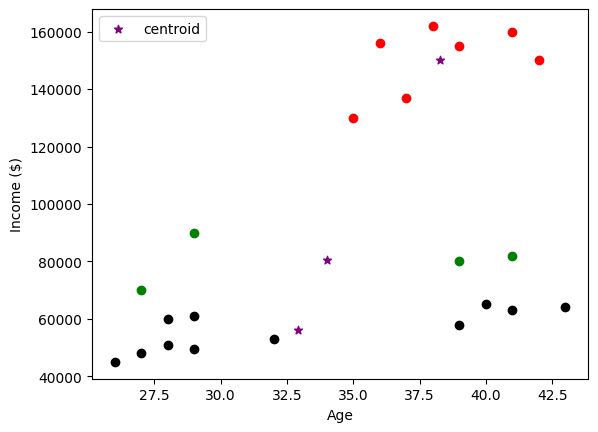

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**Preprocessing using min max scaler**

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        0
1  Michael  0.176471   0.384615        0
2    Mohan  0.176471   0.136752        2
3   Ismail  0.117647   0.128205        2
4     Kory  0.941176   0.897436        1

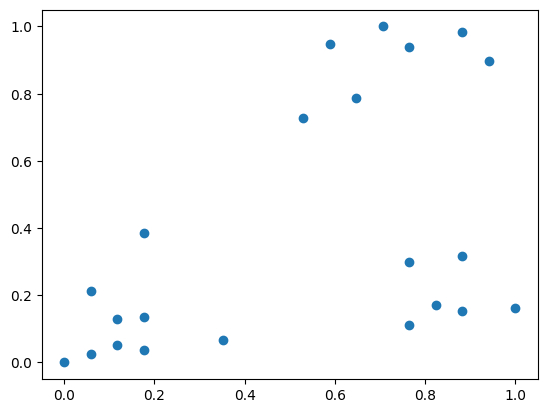

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        2
1  Michael  0.176471   0.384615        2
2    Mohan  0.176471   0.136752        2
3   Ismail  0.117647   0.128205        2
4     Kory  0.941176   0.897436        1

In [ ]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**Elbow Plot**

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Find Best Model
There are 4 ways though which you can find best model
1. Approach 1: Use train_test_split and manually tune parameters by trial and error
2. Approach 2: Use K Fold Cross validation
3. GridSearchCV
4. RandomizedSearchCV



In [ ]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:150]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
47                 4.6               3.2                1.4               0.2   
48                 5.3               3.7                1.5               0.2   
49                 5.0               3.3                1.4               0.2   
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         flower  
47       setosa  
48       setosa  
49       setosa  
50   versicolor  
51   versicolor  
..          ...  
145   virginica  
146   virginica  
147   virginica  
148   virginica  
149   virginica  

[103 rows x 5 columns]

## Approach 1: Use train_test_split and manually tune parameters by trial and error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [ ]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8888888888888888

## Approach 2: Use K Fold Cross validation

In [ ]:
# Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [ ]:
# Above approach is tiresome and very manual. We can use for loop as an alternative
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores


{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

## Approach 3: Use GridSearchCV
GridSearchCV does exactly same thing as for loop above but in a single line of code



In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00208445, 0.00138102, 0.00448384, 0.00155363, 0.00163522,
        0.00134988]),
 'std_fit_time': array([6.29333493e-04, 3.77360504e-05, 3.61006146e-03, 1.96551363e-04,
        1.47246867e-04, 5.04027026e-05]),
 'mean_score_time': array([0.00113702, 0.00097075, 0.00291462, 0.00103297, 0.0010282 ,
        0.0009264 ]),
 'std_score_time': array([4.53990546e-05, 2.39183154e-05, 2.75745429e-03, 1.05587468e-04,
        3.25713638e-05, 4.42839262e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.002084      0.000629         0.001137        0.000045       1   
1       0.001381      0.000038         0.000971        0.000024       1   
2       0.004484      0.003610         0.002915        0.002757      10   
3       0.001554      0.000197         0.001033        0.000106      10   
4       0.001635      0.000147         0.001028        0.000033      20   
5       0.001350      0.000050         0.000926        0.000044      20   

  param_kernel                         params  split0_test_score  \
0          rbf      {'C': 1, 'kernel': 'rbf'}           0.966667   
1       linear   {'C': 1, 'kernel': 'linear'}           0.966667   
2          rbf     {'C': 10, 'kernel': 'rbf'}           0.966667   
3       linear  {'C': 10, 'kernel': 'linear'}           1.000000   
4          rbf     {'C': 20, 'kernel': 'rbf'}           0.966667   
5       linear  {'C': 20, 'kernel': 'linear'}           1.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0           0.966667           0.966667                1.0   
1                1.0           0.966667           0.966667                1.0   
2                1.0           0.966667           0.966667                1.0   
3                1.0           0.900000           0.966667                1.0   
4                1.0           0.900000           0.966667                1.0   
5                1.0           0.900000           0.933333                1.0   

   mean_test_score  std_test_score  rank_test_score  
0         0.980000        0.016330                1  
1         0.980000        0.016330                1  
2         0.980000        0.016330                1  
3         0.973333        0.038873                4  
4         0.966667        0.036515                5  
5         0.966667        0.042164                6

In [ ]:
df[['param_C','param_kernel','mean_test_score']]


param_C param_kernel  mean_test_score
0       1          rbf         0.980000
1       1       linear         0.980000
2      10          rbf         0.980000
3      10       linear         0.973333
4      20          rbf         0.966667
5      20       linear         0.966667

In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
clf.best_score_

0.9800000000000001

In [ ]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

## Approatch 4 : Use RandomizedSearchCV
to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0      10          rbf         0.980000
1      10       linear         0.973333

In [ ]:
# How about different models with different hyperparameters?

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                best_params
0                  svm    0.980000  {'C': 1, 'kernel': 'rbf'}
1        random_forest    0.960000       {'n_estimators': 10}
2  logistic_regression    0.966667                   {'C': 5}

# PCA
Reduce number of columns, reduce number of dimentions from high to low.
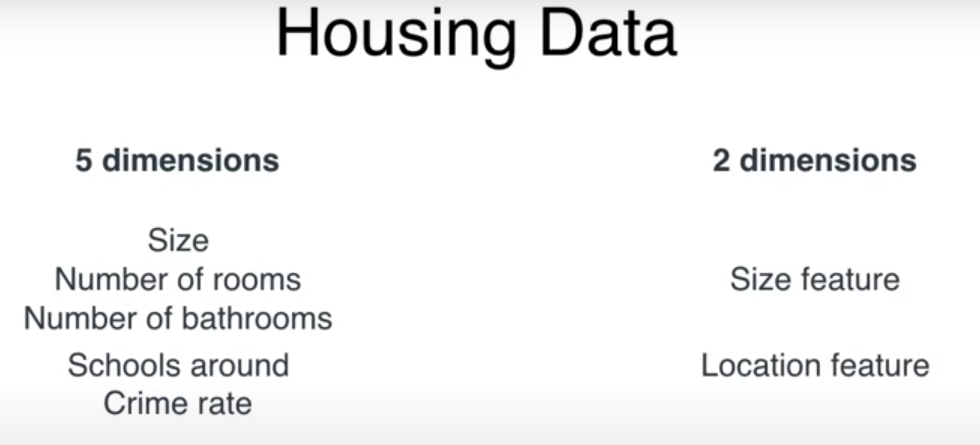

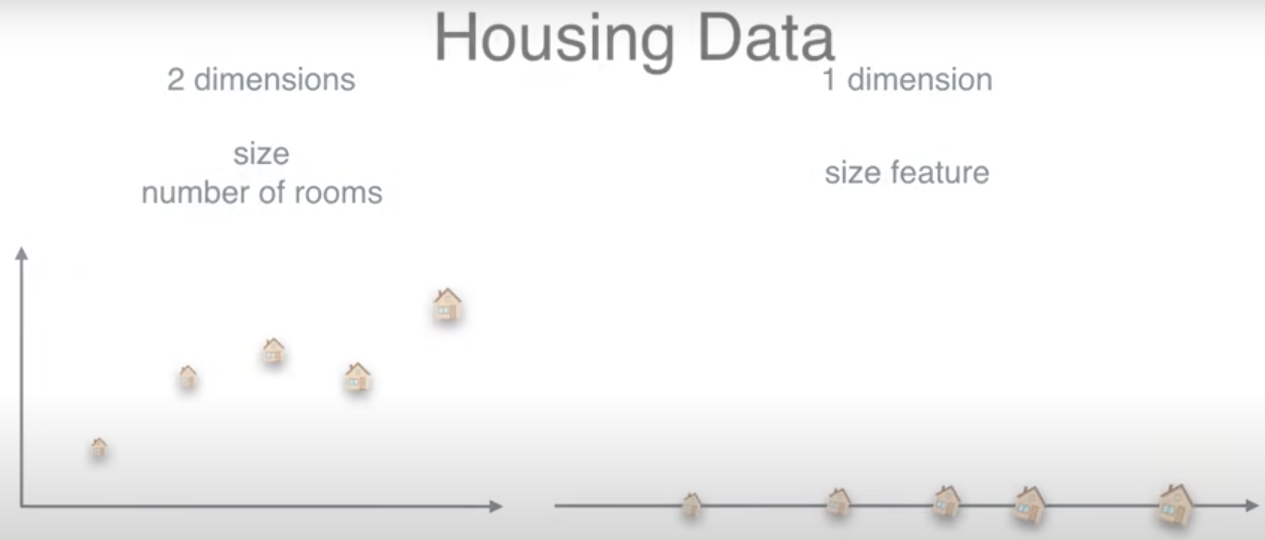

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.shape # here we have 12 columns

(918, 12)

In [ ]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
df.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40   M           ATA        140          289          0           1   
1   49   F           NAP        160          180          0           1   
2   37   M           ATA        130          283          0           2   
3   48   F           ASY        138          214          0           1   
4   54   M           NAP        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         3             0  
1    156               0      1.0         2             1  
2     98               0      0.0         3             0  
3    108               1      1.5         2             1  
4    122               0      0.0         3             0

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

Age  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  \
0   40        140          289          0           1    172               0   
1   49        160          180          0           1    156               0   
2   37        130          283          0           2     98               0   
3   48        138          214          0           1    108               1   
4   54        150          195          0           1    122               0   

   Oldpeak  ST_Slope  HeartDisease  Sex_M  ChestPainType_ATA  \
0      0.0         3             0      1                  1   
1      1.0         2             1      0                  0   
2      0.0         3             0      1                  1   
3      1.5         2             1      0                  0   
4      0.0         3             0      1                  0   

   ChestPainType_NAP  ChestPainType_TA  
0                  0                 0  
1                  1                 0  
2                  0                 0  
3                  0                 0  
4                  1                 0

In [ ]:
X = df.drop("HeartDisease",axis='columns')
y = df.HeartDisease
X.head()

Age  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  \
0   40        140          289          0           1    172               0   
1   49        160          180          0           1    156               0   
2   37        130          283          0           2     98               0   
3   48        138          214          0           1    108               1   
4   54        150          195          0           1    122               0   

   Oldpeak  ST_Slope  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0         3      1                  1                  0   
1      1.0         2      0                  0                  1   
2      0.0         3      1                  1                  0   
3      1.5         2      0                  0                  0   
4      0.0         3      1                  0                  1   

   ChestPainType_TA  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ...,  2.07517671,
        -0.53283777, -0.22967867],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.48188667,
         1.87674385, -0.22967867],
       [-1.75135854, -0.12951283,  0.7701878 , ...,  2.07517671,
        -0.53283777, -0.22967867],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ..., -0.48188667,
        -0.53283777, -0.22967867],
       [ 0.37009972, -0.12951283,  0.34027522, ...,  2.07517671,
        -0.53283777, -0.22967867],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.48188667,
         1.87674385, -0.22967867]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8586956521739131

**Use PCA to reduce dimensions**

In [ ]:
X

Age  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40        140          289          0           1    172   
1     49        160          180          0           1    156   
2     37        130          283          0           2     98   
3     48        138          214          0           1    108   
4     54        150          195          0           1    122   
..   ...        ...          ...        ...         ...    ...   
913   45        110          264          0           1    132   
914   68        144          193          1           1    141   
915   57        130          131          0           1    115   
916   57        130          236          0           3    174   
917   38        138          175          0           1    173   

     ExerciseAngina  Oldpeak  ST_Slope  Sex_M  ChestPainType_ATA  \
0                 0      0.0         3      1                  1   
1                 0      1.0         2      0                  0   
2                 0      0.0         3      1                  1   
3                 1      1.5         2      0                  0   
4                 0      0.0         3      1                  0   
..              ...      ...       ...    ...                ...   
913               0      1.2         2      1                  0   
914               0      3.4         2      1                  0   
915               1      1.2         2      1                  0   
916               0      0.0         2      0                  1   
917               0      0.0         3      1                  0   

     ChestPainType_NAP  ChestPainType_TA  
0                    0                 0  
1                    1                 0  
2                    0                 0  
3                    0                 0  
4                    1                 0  
..                 ...               ...  
913                  0                 1  
914                  0                 0  
915                  0                 0  
916                  0                 0  
917                  1                 0  

[918 rows x 13 columns]

Here we can see that we have 13 domentions/columns now use PCA to reduce it

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95) # Retain 95% of usefull features - remove all unwanted and unimportant features
# pca = PCA(n_components=2) we can menually pass number of components/columns as input
X_pca = pca.fit_transform(X)
X_pca.shape

(918, 2)

Here now we can clearly see that 13 columns become a 2 columns so this is how dimentions reduced

In [ ]:
pca.n_components_  #print number of features/columns/dimentions

2

In [ ]:
pca.explained_variance_ratio_ #it will print waightage of top 2 columns

array([0.92023825, 0.04912935])

In [ ]:
X_pca

array([[ 92.31079119, -29.44316816],
       [-17.14409666, -13.7394731 ],
       [ 81.90733808,  38.22442746],
       ...,
       [-69.0041927 ,  17.33216411],
       [ 39.2077941 , -33.59642907],
       [-21.43805605, -37.21419015]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.7010869565217391

# Ensemble Learning: Bagging

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#check target varialbe distribution
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

There is slight imbalance in our dataset but since it is not major we will not worry about it!



In [ ]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

**Train using stand alone model**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.68831169, 0.65584416, 0.68181818, 0.79738562, 0.74509804])

In [ ]:
scores.mean()

0.713691537220949

**Train using Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7534722222222222

In [ ]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [ ]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [ ]:
scores.mean()

0.7578728461081402

# Outlier Detections
1. Pecentile method
2. 3 Standard Deviation Method
3. Z-Zcore method
4. IQR (Interquartile Range) Method
5. Isolation Forest Method
6. Local Outlier Factor (LOF)
7. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/heights.csv")
df

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
9     imran    14.5
10     jose     6.1
11  deepika     5.6
12   yoseph     1.2
13    binod     5.5

## 1. Pecentile method

In [ ]:
max_thresold = df['height'].quantile(0.95)
max_thresold

9.689999999999998

In [ ]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [ ]:
# Remove outlier whoever above max and below min_thresold
df[(df['height']<max_thresold) & (df['height']>min_thresold)]

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
13    binod     5.5

## 3 standard deviation Method

In [ ]:
upper_limit = df['height'].mean() + 3*df['height'].std()
upper_limit

14.389410604519316

In [ ]:
lower_limit = df['height'].mean() - 3*df['height'].std()
lower_limit

-2.2894106045193157

Here are the outliers that are beyond 3 std dev from mean


In [ ]:
# check outlier data
df[(df["height"]>upper_limit) | (df["height"]<lower_limit)]

name  height
9  imran    14.5

In [ ]:
# Remove outlier
df[(df["height"]<upper_limit) & (df["height"]>lower_limit)]

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
12   yoseph     1.2
13    binod     5.5

## 3. Z-Score Method

In [ ]:
import numpy as np
from scipy import stats
# Calculate the z-scores for height
z_scores = np.abs(stats.zscore(df['height']))

In [ ]:
# Set a threshold for outliers (usually around 3)
lower_limit = -3
upper_limit = 3

In [ ]:
# check outlier data
df[(df["height"]>upper_limit) | (df["height"]<lower_limit)]

name  height
9  imran    14.5

In [ ]:
# remove outlier
df[(df["height"]<upper_limit) & (df["height"]>lower_limit)]

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
12   yoseph     1.2
13    binod     5.5

## IQR Method

In [ ]:
Q1 = df["height"].quantile(0.25)
Q3 = df["height"].quantile(0.75)
Q1, Q3

(5.25, 6.175)

In [ ]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.8625000000000003, 7.5625)

In [ ]:
# check outlier data
df[(df["height"]>upper_limit) | (df["height"]<lower_limit)]

name  height
9    imran    14.5
12  yoseph     1.2

In [ ]:
# remove outlier
df[(df["height"]<upper_limit) | (df["height"]>lower_limit)]

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
9     imran    14.5
10     jose     6.1
11  deepika     5.6
12   yoseph     1.2
13    binod     5.5

## Isolation Forest
Isolation Forest is an ensemble-based outlier detection algorithm that builds random isolation trees to isolate outliers efficiently. It works by randomly selecting features and then randomly selecting split points between the minimum and maximum values of the selected feature. Outliers are identified as data points that require fewer splits to be isolated compared to regular data points. The key concepts of Isolation Forest are:

1. Isolation Trees: A binary tree that recursively divides the data points into isolated regions.
2. Path Length: The number of splits required to isolate a data point.

Main Characteristics:

1. Efficient and effective for high-dimensional datasets.
2. Does not assume a specific distribution of data.
3. It can handle large datasets well.

In [ ]:
from sklearn.ensemble import IsolationForest
clf_isof = IsolationForest(contamination=0.1)
clf_isof.fit(df[['height']])
isof_outliers = df[clf_isof.predict(df[['height']]) == -1]
print("\nIsolation Forest Outliers:")
print(isof_outliers)


Isolation Forest Outliers:
      name  height
9    imran    14.5
12  yoseph     1.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Remove Outlier
df[clf_isof.predict(df[['height']]) == 1]

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
13    binod     5.5

## Local Outlier Factor (LOF)

LOF is a density-based outlier detection algorithm that assesses the density deviation of a data point with respect to its neighbors. It measures the local density of a point compared to the densities of its k-nearest neighbors. Outliers have significantly lower local densities compared to their neighbors. The key concept of LOF is:

1. Local Density: The density of a data point within the local region defined by its k-nearest neighbors.

Main Characteristics:

1. LOF provides an anomaly score for each data point, indicating how much it deviates from its neighbors.
2. It is sensitive to the local density of data points, making it useful for datasets with varying densities.
3. It is efficient for high-dimensional data.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf_lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
lof_outlier_scores = clf_lof.fit_predict(df[['height']])
lof_outliers = df[lof_outlier_scores == -1]
lof_no_outliers = df[lof_outlier_scores == 1]
print("\nLocal Outlier Factor Outliers:")
print(lof_outliers)
print("\nData without Local Outlier Factor Outliers:")
print(lof_no_outliers)


Local Outlier Factor Outliers:
      name  height
9    imran    14.5
12  yoseph     1.2

Data without Local Outlier Factor Outliers:
       name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
13    binod     5.5


## DBSCAN Method
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that can be used for outlier detection as well. It identifies outliers as data points that do not belong to any cluster or have very few neighboring points within a specified radius (eps). The key concepts of DBSCAN are:

1. Core Points: Points that have at least a minimum number of other points (min_samples) within the specified radius.
2. Border Points: Points that have fewer neighboring points than the minimum required but are reachable from core points.
3. Noise Points: Points that are neither core nor border points.

Main Characteristics:

1. Suitable for datasets with varying density and irregularly shaped clusters.
2. The number of clusters is not pre-defined.
3. DBSCAN does not assume a specific distribution of data.

In [ ]:
from sklearn.cluster import DBSCAN
# Method 6: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(df[['height']])
dbscan_outliers = df[dbscan.labels_ == -1]
dbscan_no_outliers = df[dbscan.labels_ != -1]
print("\nDBSCAN Outliers:")
print(dbscan_outliers)
print("\nData without DBSCAN Outliers:")
print(dbscan_no_outliers)


DBSCAN Outliers:
      name  height
9    imran    14.5
12  yoseph     1.2

Data without DBSCAN Outliers:
       name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
10     jose     6.1
11  deepika     5.6
13    binod     5.5


# Feature Scaling
1. Standardization
2. Normalization

## 1. Standardization
Standardization, also known as feature scaling, is a data preprocessing technique commonly used in machine learning. It involves transforming the features (variables) of the dataset to have a common scale or distribution. The purpose of standardization is to bring all features to a similar range so that they contribute equally to the learning process and prevent one feature from dominating over the others due to differences in scale or magnitude.

The standardization process involves the following steps for each feature:

1. Calculate the mean (average) of the feature values.
2. Calculate the standard deviation of the feature values.
3. Subtract the mean from each value and then divide the result by the standard deviation.

standardized_X = (X - mean(X)) / standard_deviation(X)

**The result of standardization is that the feature will have a mean of 0 and a standard deviation of 1**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Social_Network_Ads.csv')
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
#removed non-numeric features
df=df.iloc[:,2:]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [ ]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [ ]:
np.round(X_train_scaled.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

**Effect of Scaling**

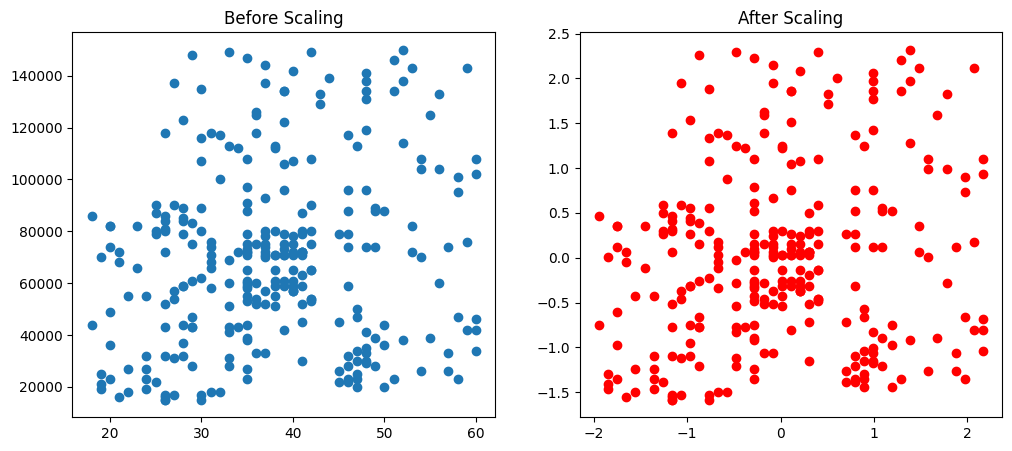

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

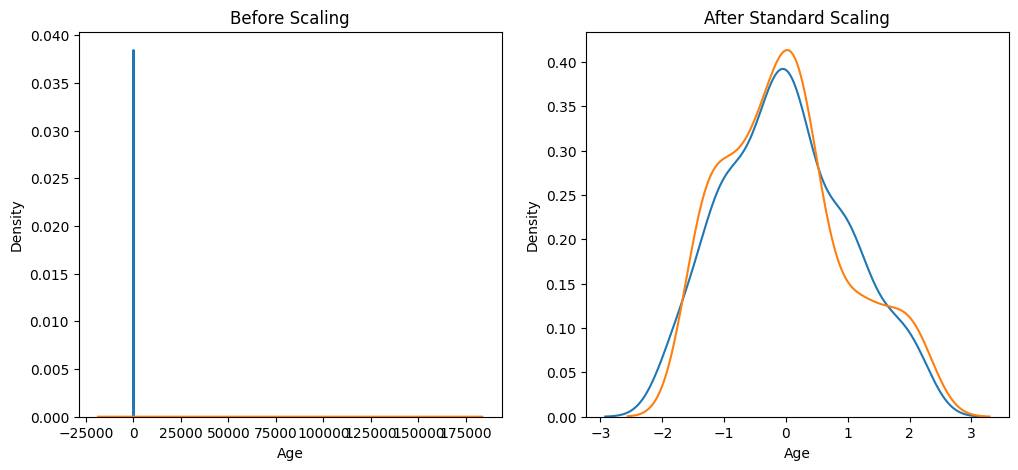

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

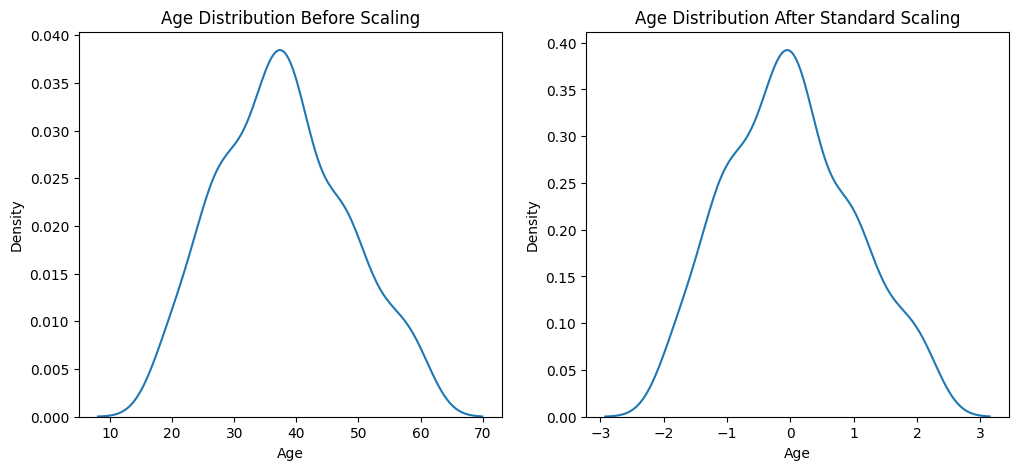

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

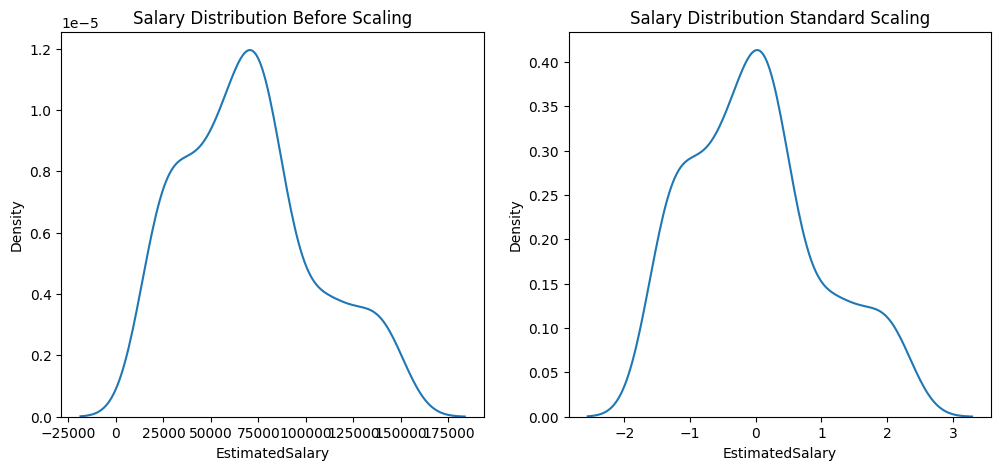

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

**Why scaling is important?**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


Here we can clearly sees that after scaling accuracy increased

## Normalization

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

Class label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59

<Axes: xlabel='Alcohol', ylabel='Density'>

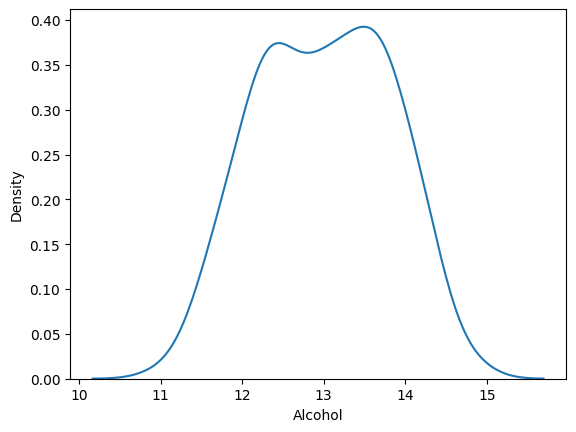

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

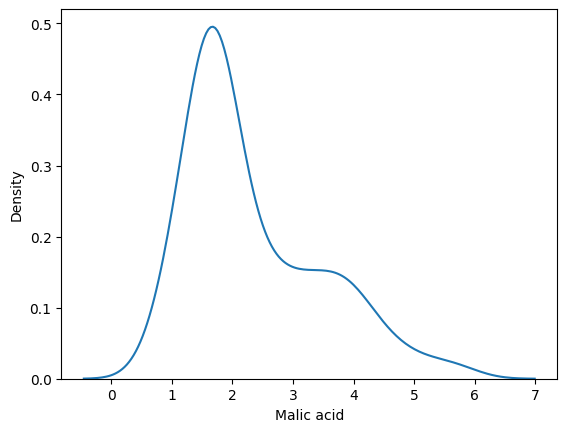

In [ ]:
sns.kdeplot(df['Malic acid'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid
count    124.0       124.0
mean      13.0         2.4
std        0.8         1.1
min       11.0         0.9
25%       12.4         1.6
50%       13.0         1.9
75%       13.6         3.2
max       14.8         5.6

In [ ]:
np.round(X_train_scaled.describe(), 1)

Alcohol  Malic acid
count    124.0       124.0
mean       0.5         0.3
std        0.2         0.2
min        0.0         0.0
25%        0.4         0.2
50%        0.5         0.2
75%        0.7         0.5
max        1.0         1.0

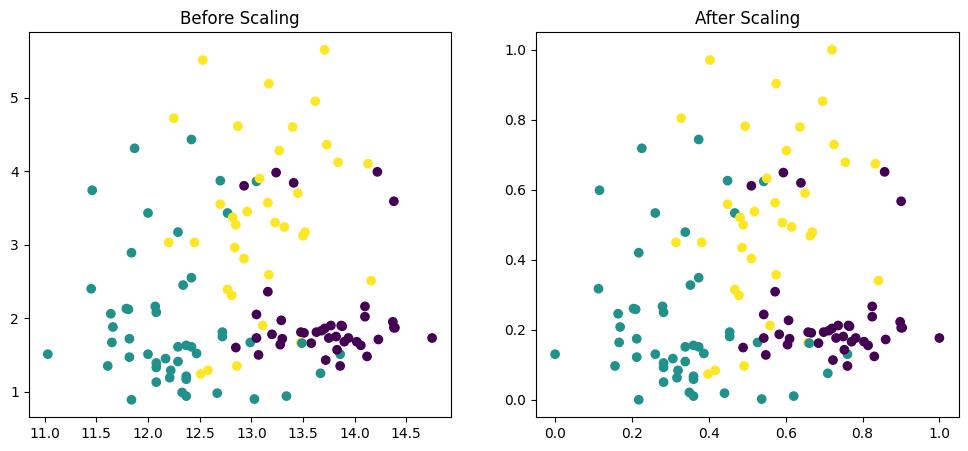

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

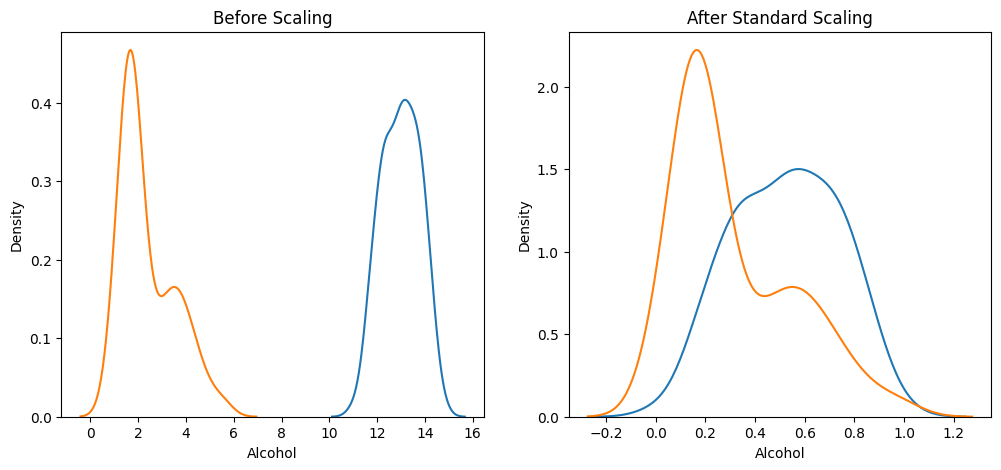

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

# Column Transformer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer  # for missing value treatment for numeric column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/covid_toy.csv')
df.head()

age  gender  fever cough     city has_covid
0   60    Male  103.0  Mild  Kolkata        No
1   27    Male  100.0  Mild    Delhi       Yes
2   42    Male  101.0  Mild    Delhi        No
3   31  Female   98.0  Mild  Kolkata        No
4   65  Female  101.0  Mild   Mumbai        No

In [ ]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

**1. Aam Zindagi**

In [ ]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])

X_train_fever.shape

(80, 1)

In [ ]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [ ]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 4)

In [ ]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [ ]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

**Mentos Zindagi**

In [ ]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')
transformer.fit_transform(X_train).shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 7)

In [ ]:
transformer.transform(X_test).shape

(20, 7)

# ML Pipeline
it is used to make a chain of multiple small small task and output of one step will become input for next step

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/titanic.csv')
df.head()

PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [3]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0

In [7]:
print("===============")
print("Data Type info")
print("===============")
print(df.info())
print("===============")
print("isna? : is there any null value in dataset")
print("===============")
print(df.isna().any())
print("===============")
print("isna? : is there any null value in dataset")
print("===============")
print("corelation")
print("===============")
print(df.corr())
print("===============")
print("describe")
print("===============")
print(df.describe())
print("===============")

Data Type info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
isna? : is there any null value in dataset
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
Survived    False
dtype: bool
isna? : is there any null value in dataset
corelation
            Pclass       Age     SibSp     Parch      Fare  Survived
Pclass    1.000000 -0.369226  0.083081  0.018443 -0.549500 -0.338481
Age      -0.369226  1.000000 -0.

<ipython-input-7-3d3a929aa970>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [9]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [4]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [5]:
X_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
331       1    male  45.5      0      0  28.5000        S
733       2    male  23.0      0      0  13.0000        S
382       3    male  32.0      0      0   7.9250        S
704       3    male  26.0      1      0   7.8542        S
813       3  female   6.0      4      2  31.2750        S

In [6]:
y_train.sample(5)

858    1
248    1
597    0
651    1
124    0
Name: Survived, dtype: int64

In [ ]:
# imputation transformer : here we will impute two columns value
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [ ]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [ ]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [ ]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [ ]:
# train the model
trf5 = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [ ]:
# train
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7890b06e45e0>)),
                ('trf5', DecisionTreeClassifier())])

In [ ]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x7890b06e45e0>),
 'trf5': DecisionTreeClassifier()}

In [ ]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

**GridSearch using Pipeline**

In [ ]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7890b06e45e0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.6391214419383433

In [ ]:
grid.best_params_

{'trf5__max_depth': 2}

In [ ]:
# Exporting the Pipeline
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

# Transformer
Used to Convert Non-Normal Distribution to Normal Distribution

Linear Regression and Logistic regression needs normal distribution data then only it will work better
1. Function Transformer
  --> Log Transformer
2. Power Transformer   

##  1. Log Transformer

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

Age     Fare  Survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [ ]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

Age     Fare  Survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-29-1c15e8485d0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


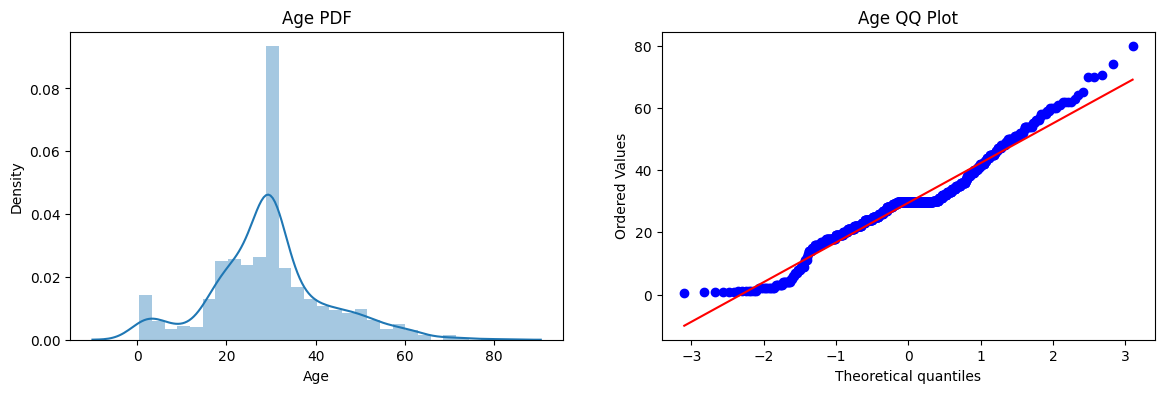

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

<ipython-input-30-921b0fa8d620>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


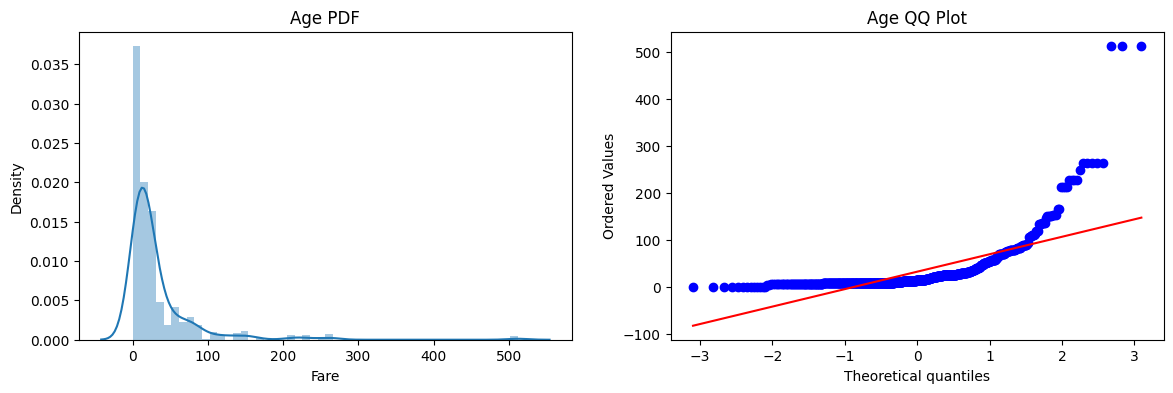

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [ ]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [ ]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588389513108613


In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

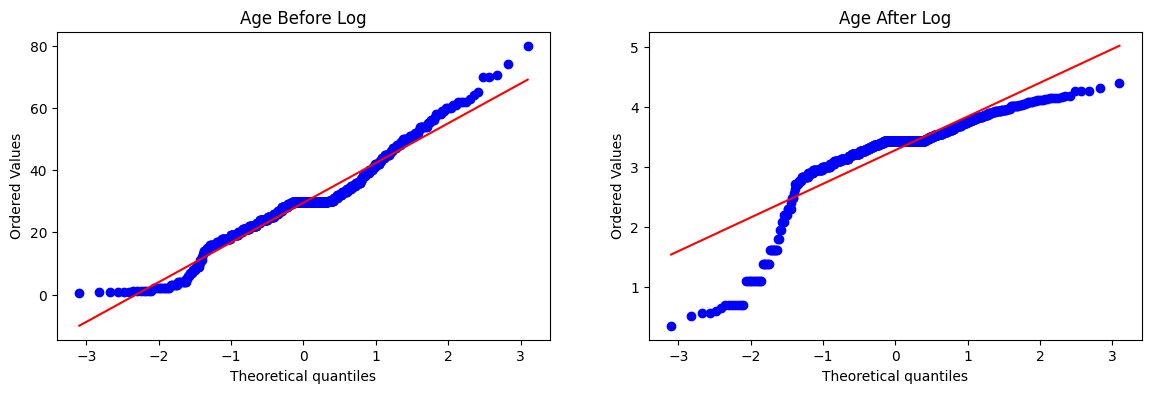

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

## 2. PowerTransformer - convert non normal distribution to normal distribution
  1. Box-Cox Transformer : it is general transformer (it works only with number > 0)
  2. Yeo Jhonson Transformer (it works with 0 and -ve numbers)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/concrete_data.csv')
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [ ]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [ ]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628606

<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


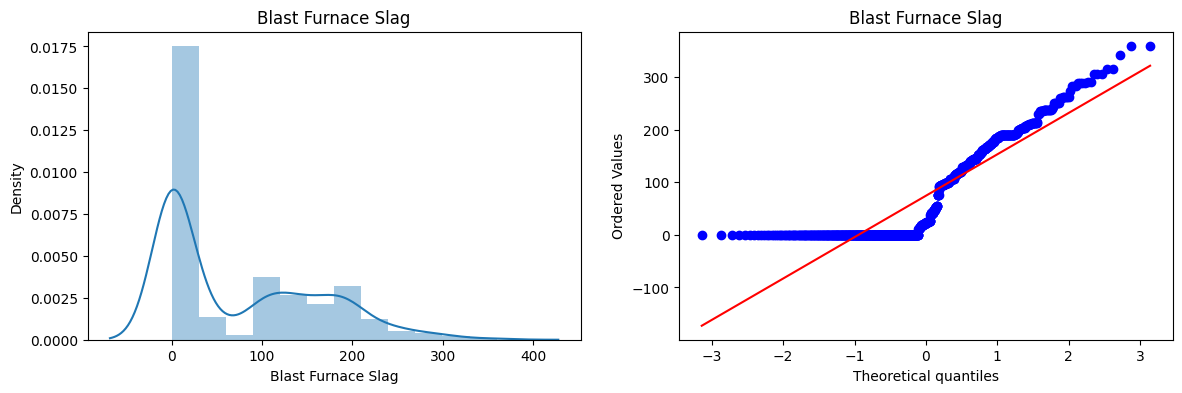

<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


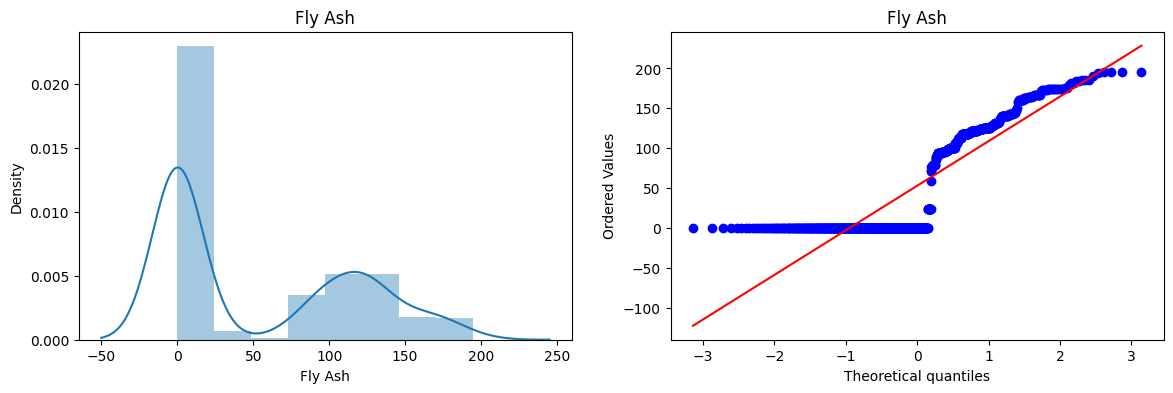

<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


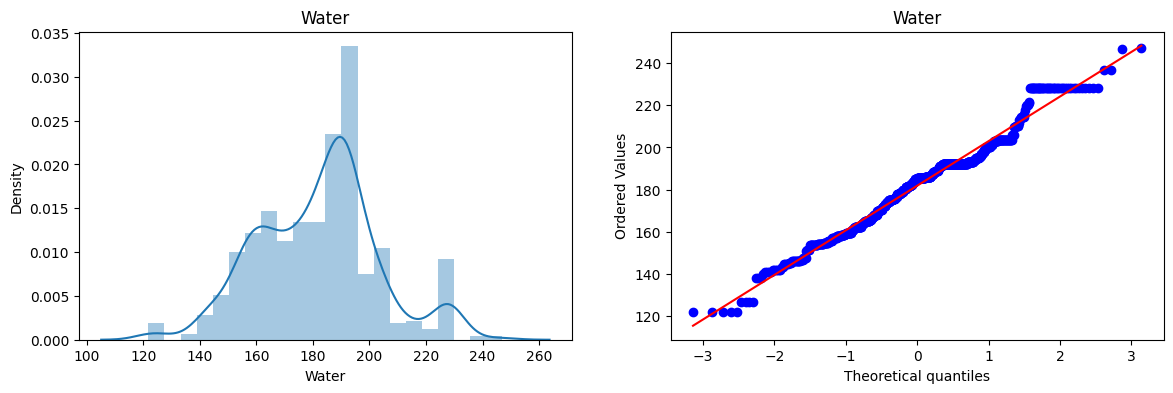

<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


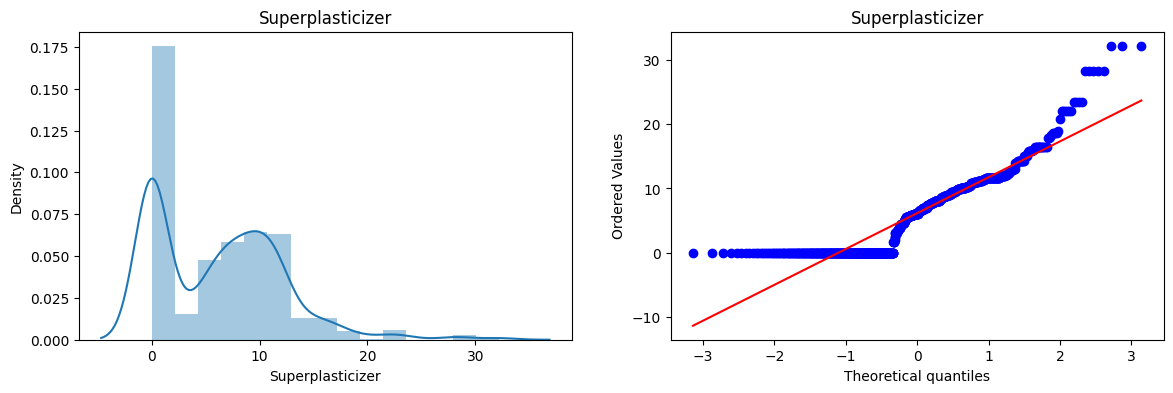

<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


<ipython-input-10-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


In [ ]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [ ]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0              Cement         0.177025
1  Blast Furnace Slag         0.025093
2             Fly Ash        -0.038970
3               Water         0.772682
4    Superplasticizer         0.098811
5    Coarse Aggregate         1.129813
6      Fine Aggregate         1.782019
7                 Age         0.066631

In [ ]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825006181188

In [ ]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219863

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


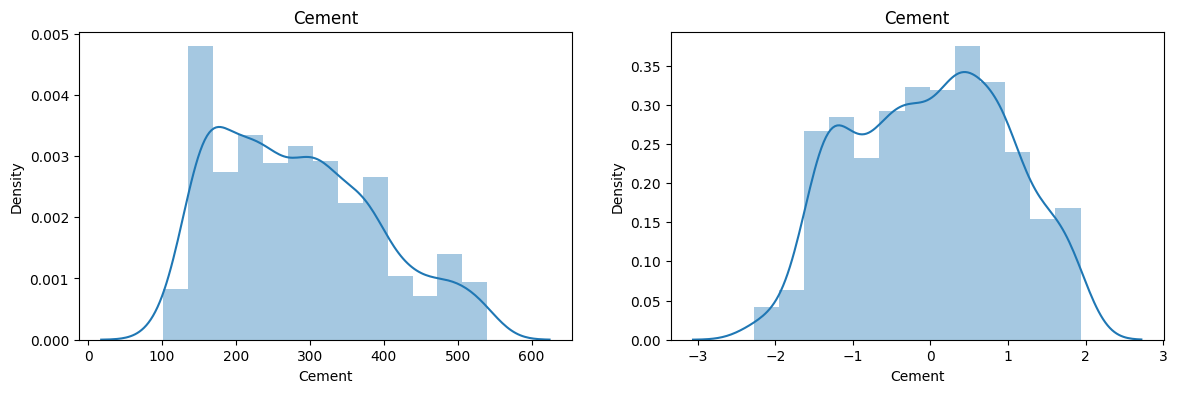

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


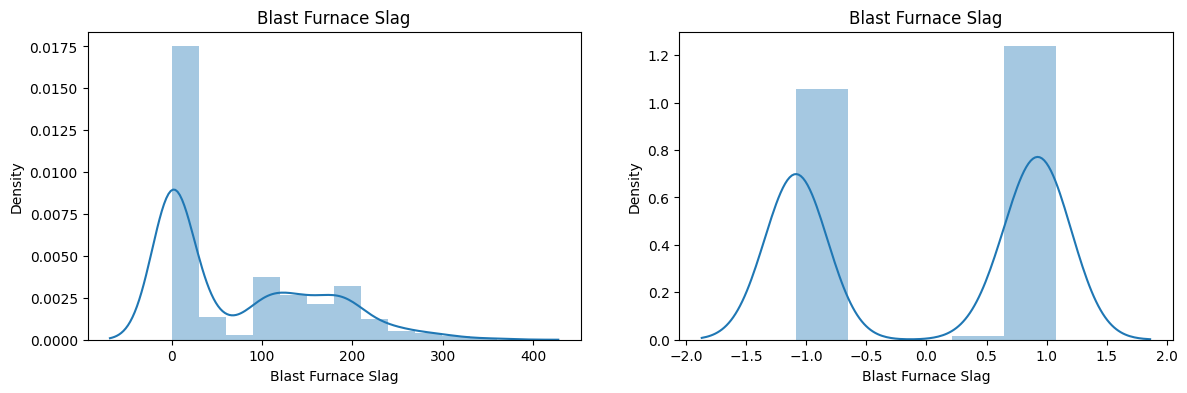

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


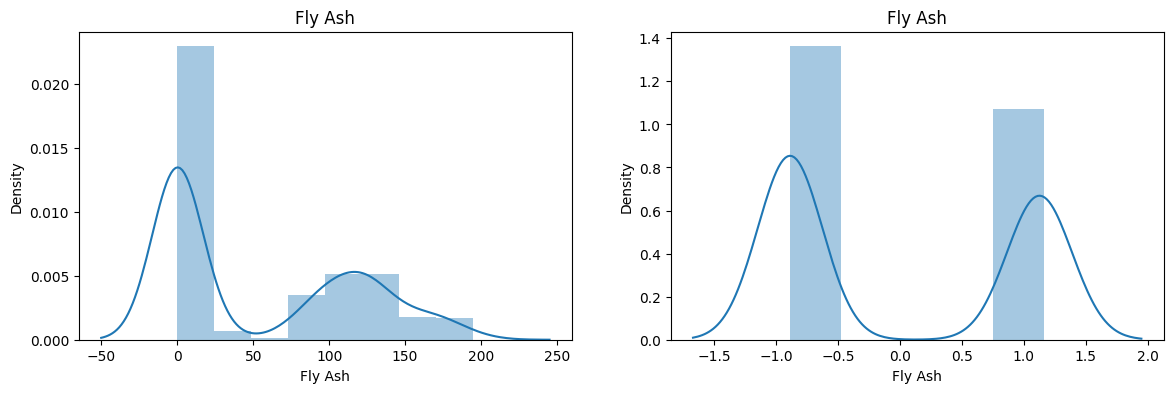

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


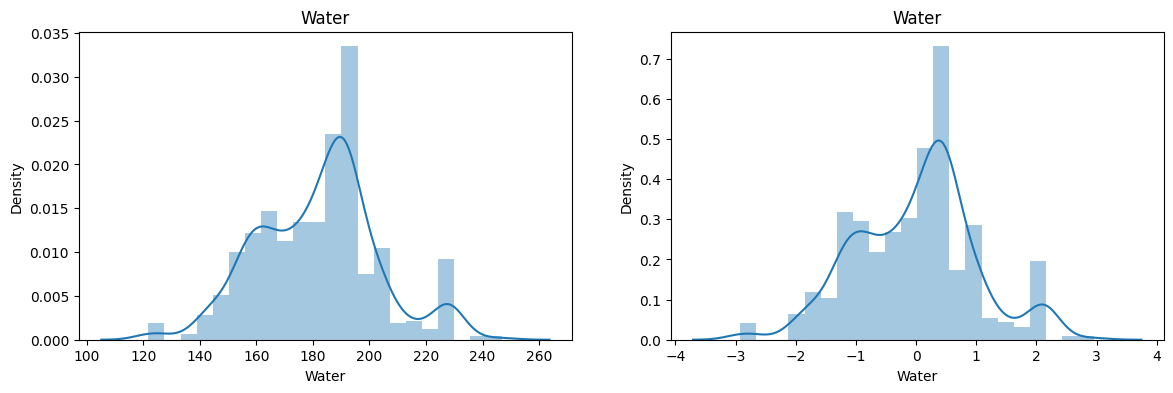

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


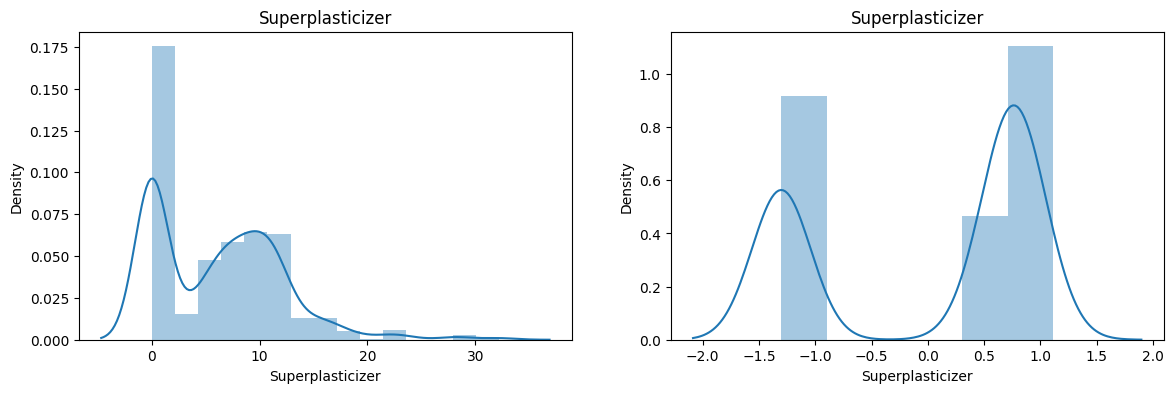

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


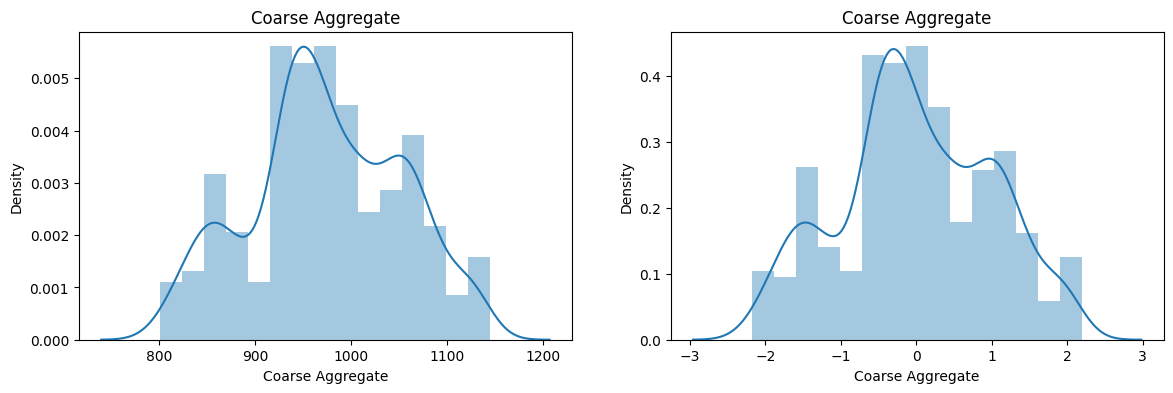

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


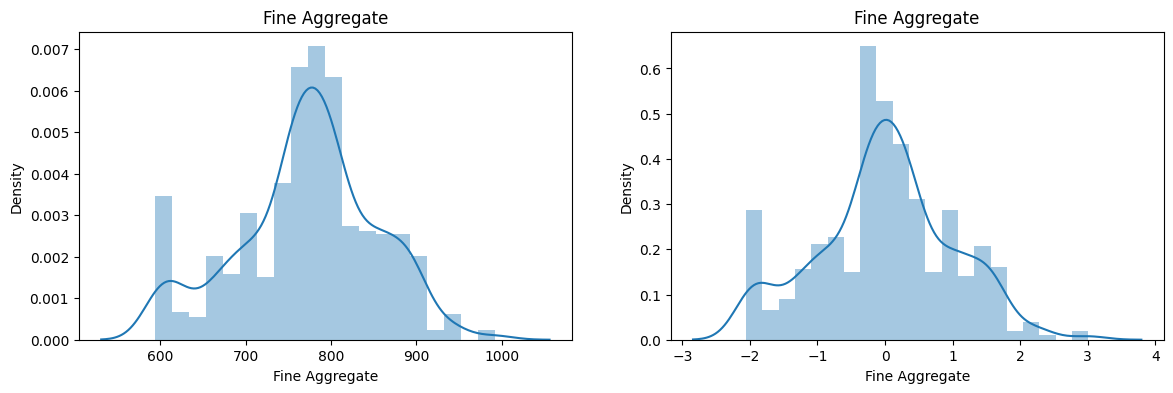

<ipython-input-14-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-14-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


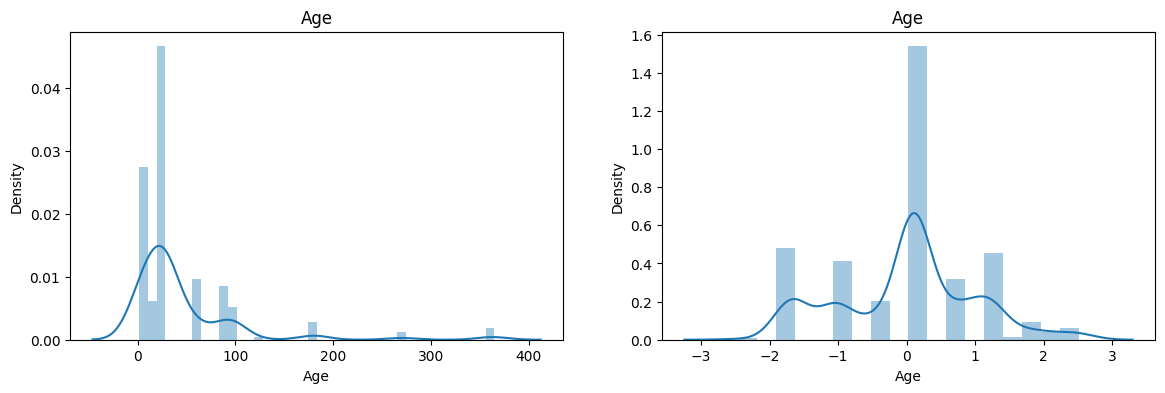

In [ ]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

## 2. Yeo-Johnson transform

In [ ]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906512004999


cols  Yeo_Johnson_lambdas
0              Cement             0.174348
1  Blast Furnace Slag             0.015715
2             Fly Ash            -0.161447
3               Water             0.771307
4    Superplasticizer             0.253935
5    Coarse Aggregate             1.130050
6      Fine Aggregate             1.783100
7                 Age             0.019885

In [ ]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500866

In [ ]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)


<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


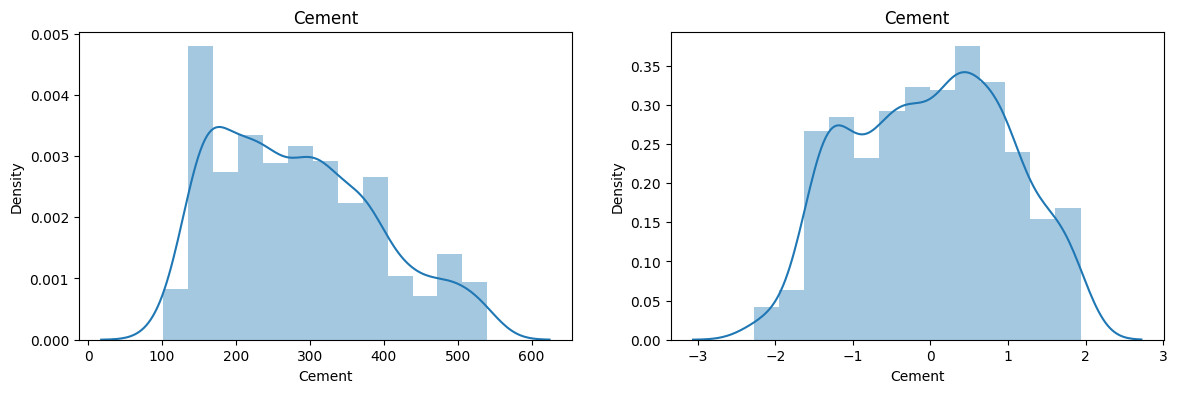

<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


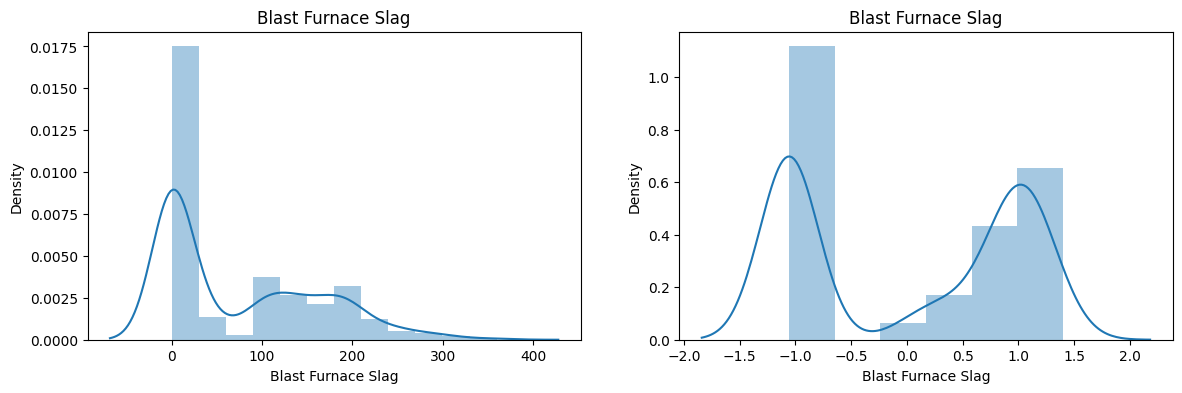

<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


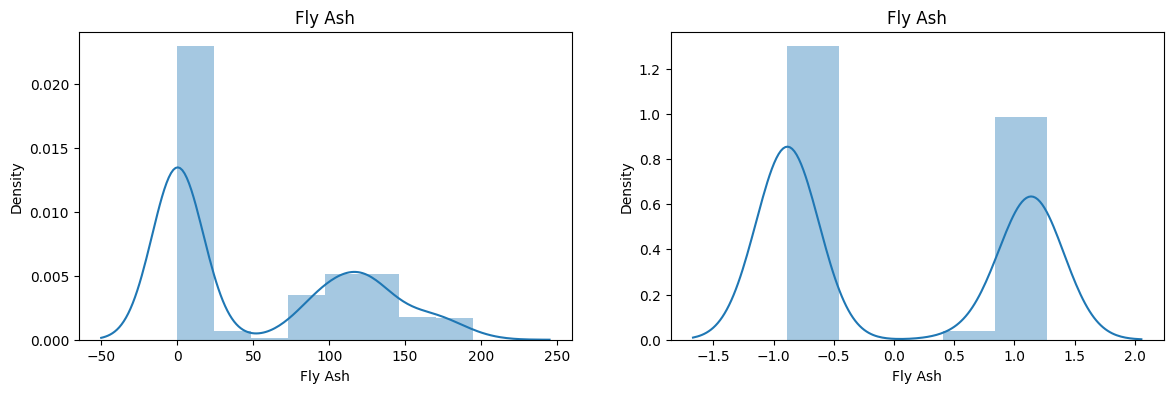

<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


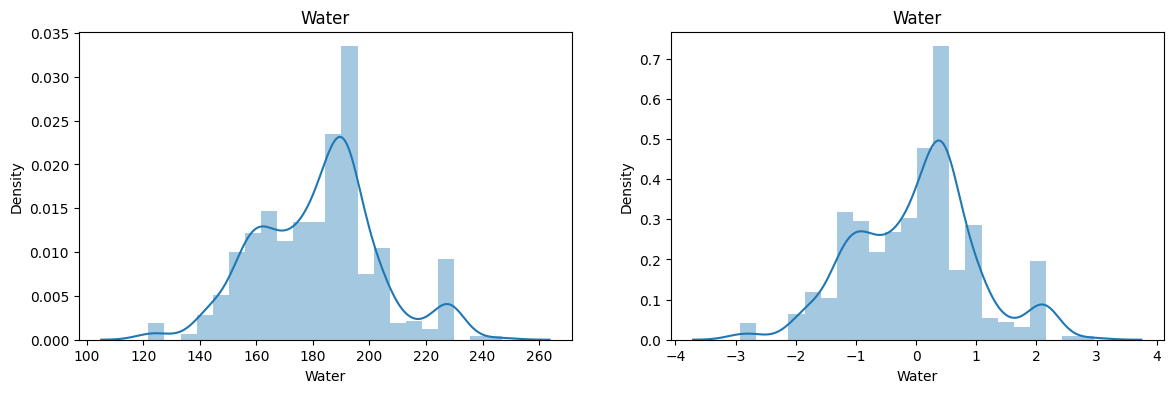

<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


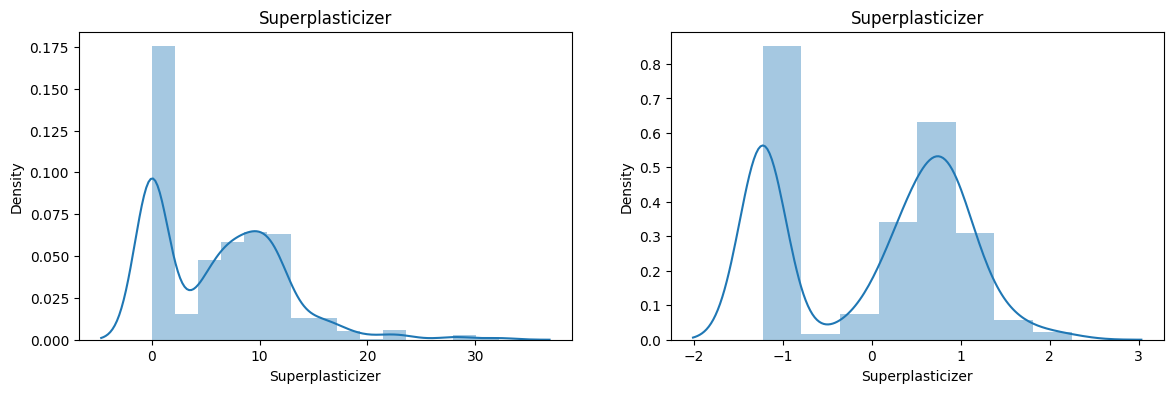

<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


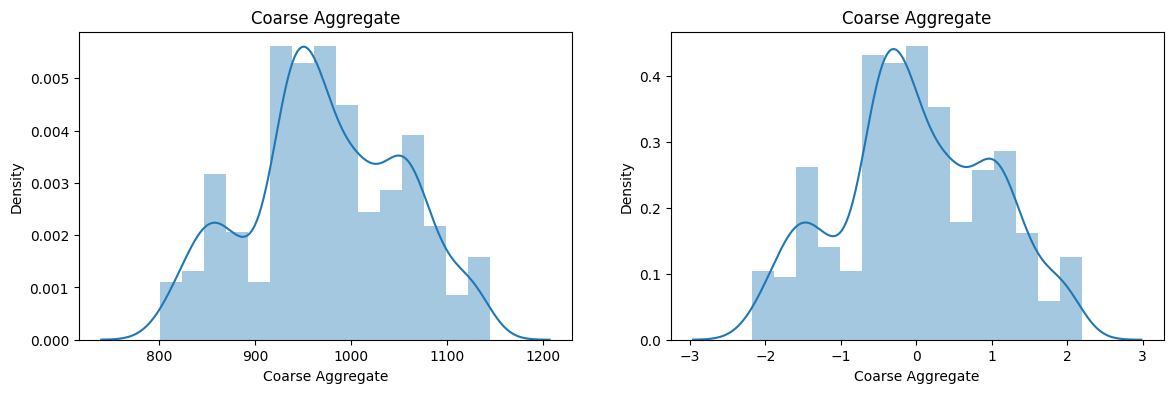

<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


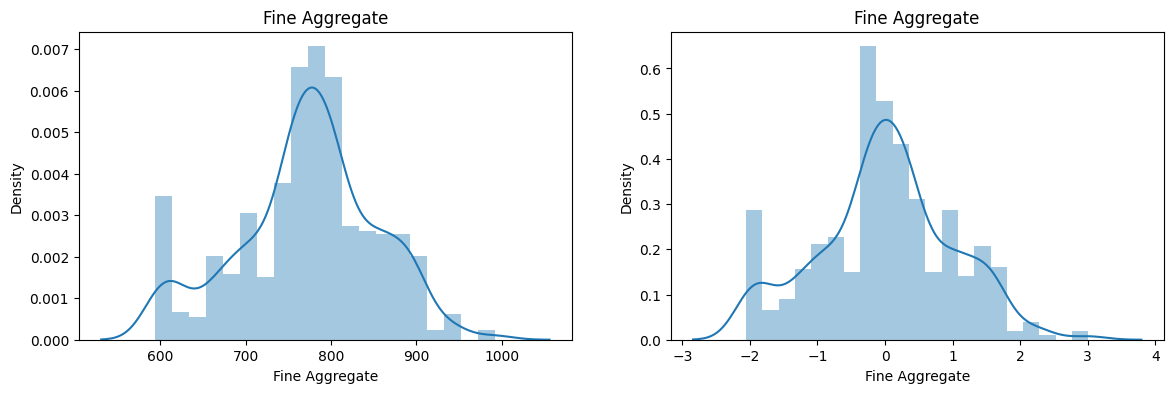

<ipython-input-18-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-18-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


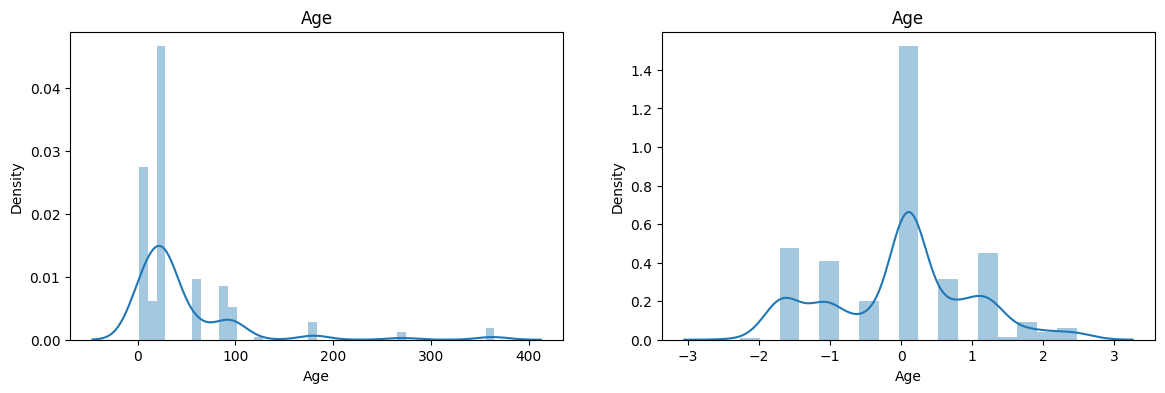

In [ ]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [ ]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

cols  box_cox_lambdas  Yeo_Johnson_lambdas
0              Cement         0.169544             0.174348
1  Blast Furnace Slag         0.016633             0.015715
2             Fly Ash        -0.136480            -0.161447
3               Water         0.808438             0.771307
4    Superplasticizer         0.264160             0.253935
5    Coarse Aggregate         1.129395             1.130050
6      Fine Aggregate         1.830763             1.783100
7                 Age         0.001771             0.019885

# Hnadling Mixed data
we can easily treat numerical and categorical but what if both combined ?


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/mixed_data.csv')
df.head()

Cabin            Ticket number  Survived
0   NaN         A/5 21171      5         0
1   C85          PC 17599      3         1
2   NaN  STON/O2. 3101282      6         1
3  C123            113803      3         1
4   NaN            373450      A         0

In [ ]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [ ]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

Text(0.5, 1.0, 'Passengers travelling with')

In [ ]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [ ]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

Cabin            Ticket number  Survived  number_numerical  \
0   NaN         A/5 21171      5         0               5.0   
1   C85          PC 17599      3         1               3.0   
2   NaN  STON/O2. 3101282      6         1               6.0   
3  C123            113803      3         1               3.0   
4   NaN            373450      A         0               NaN   

  number_categorical  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                  A

In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:

df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

Cabin            Ticket number  Survived  number_numerical  \
0   NaN         A/5 21171      5         0               5.0   
1   C85          PC 17599      3         1               3.0   
2   NaN  STON/O2. 3101282      6         1               6.0   
3  C123            113803      3         1               3.0   
4   NaN            373450      A         0               NaN   

  number_categorical cabin_num cabin_cat  
0                NaN       NaN       NaN  
1                NaN        85         C  
2                NaN       NaN       NaN  
3                NaN       123         C  
4                  A       NaN       NaN

<Axes: >

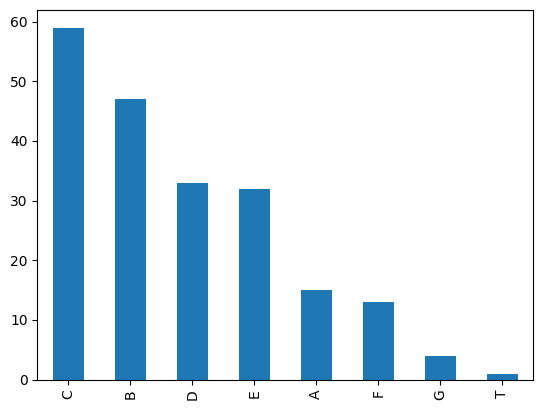

In [ ]:
df['cabin_cat'].value_counts().plot(kind='bar')